In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics, ensemble, preprocessing, impute, linear_model, pipeline, compose, naive_bayes, tree, svm, feature_selection, neighbors
import seaborn as sns
import matplotlib.pyplot as plt
# from xgboost import XGBClassifier
import itertools

sns.set_style('whitegrid')



In [3]:
# Load the data
#df = pd.read_csv('train.csv')
# Take a look
# df.head()

train = pd.read_csv('train.csv', index_col = 'PassengerId')
test = pd.read_csv('test.csv', index_col = 'PassengerId')


In [4]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
valueCounts = dict()

for col in train.columns:
    valueCounts[col] = train[col].value_counts()
    
valueCounts['Survived']

0    549
1    342
Name: Survived, dtype: int64

In [7]:
549 / (549+342)

0.6161616161616161

In [8]:
342 / (549+342)

0.3838383838383838

In [9]:
categorical = [col for col in train.columns if train[col].dtype == 'object' or train[col].nunique() <= 8]

numerical = [col for col in train.columns if col not in categorical]

categorical, numerical

(['Survived',
  'Pclass',
  'Name',
  'Sex',
  'SibSp',
  'Parch',
  'Ticket',
  'Cabin',
  'Embarked'],
 ['Age', 'Fare'])

In [10]:
categorical.remove('Name')
categorical.remove('Ticket')
categorical.remove('Survived')
categorical.remove('Cabin')

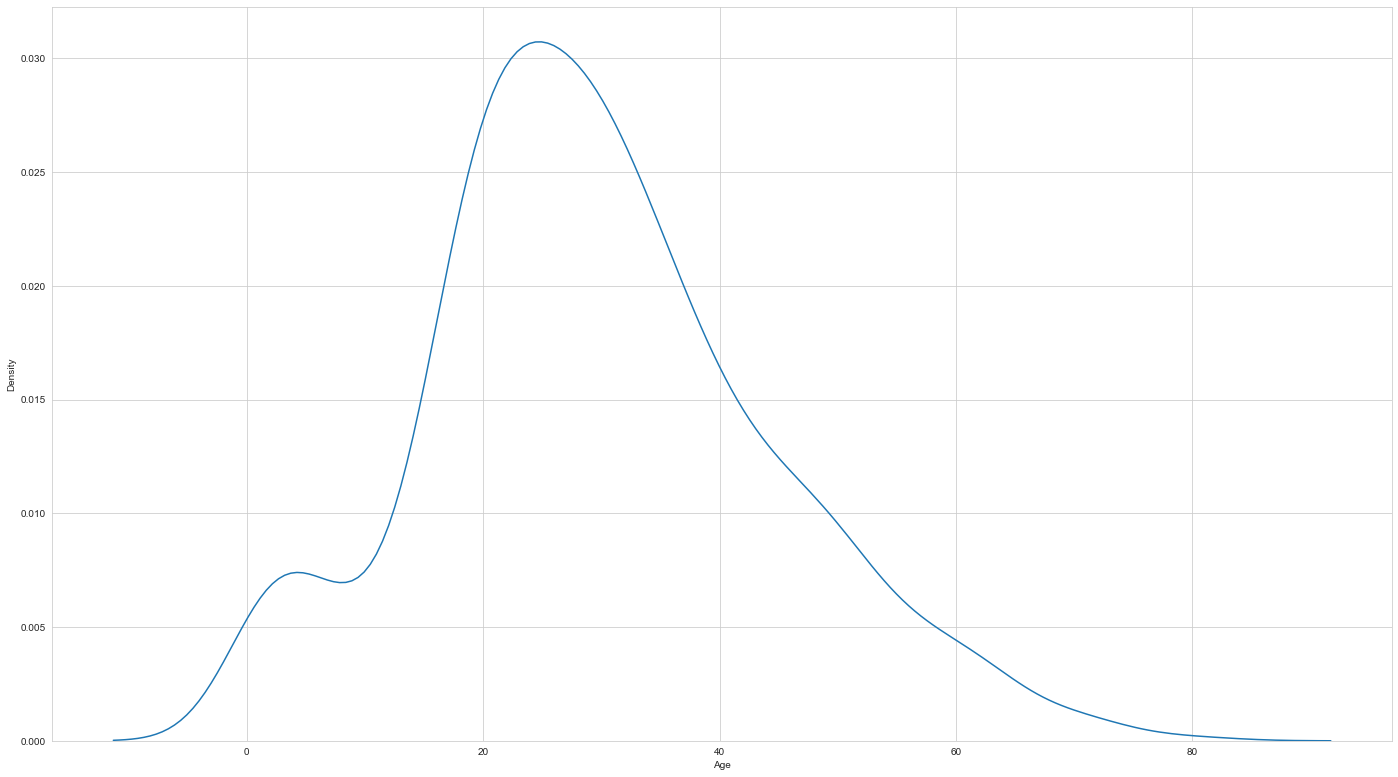

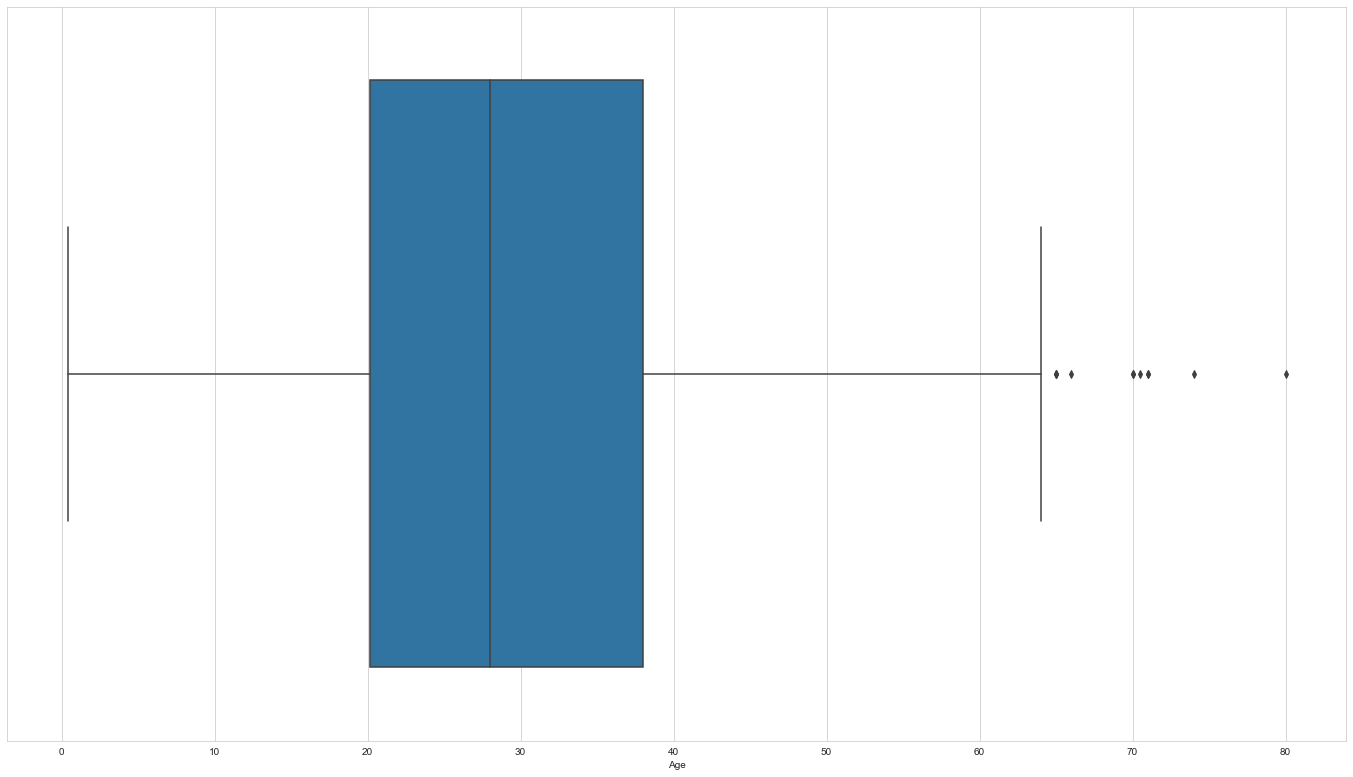

In [11]:
plt.figure(figsize=(24,13.5))
sns.kdeplot(data=train['Age'])
plt.show()

plt.figure(figsize=(24,13.5))
sns.boxplot(data=train, orient='h', x='Age')
plt.show()

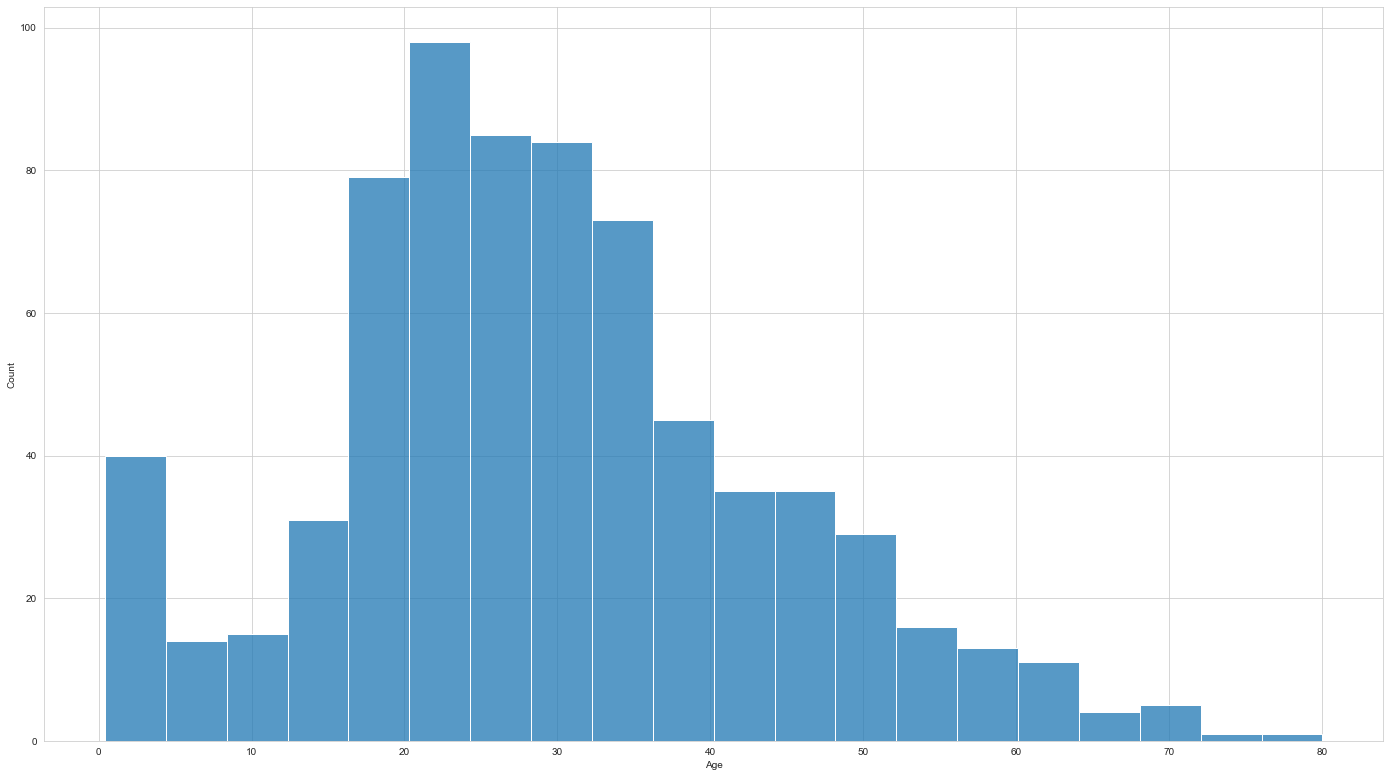

In [12]:
plt.figure(figsize=(24,13.5))
sns.histplot(data=train['Age'])
plt.show()

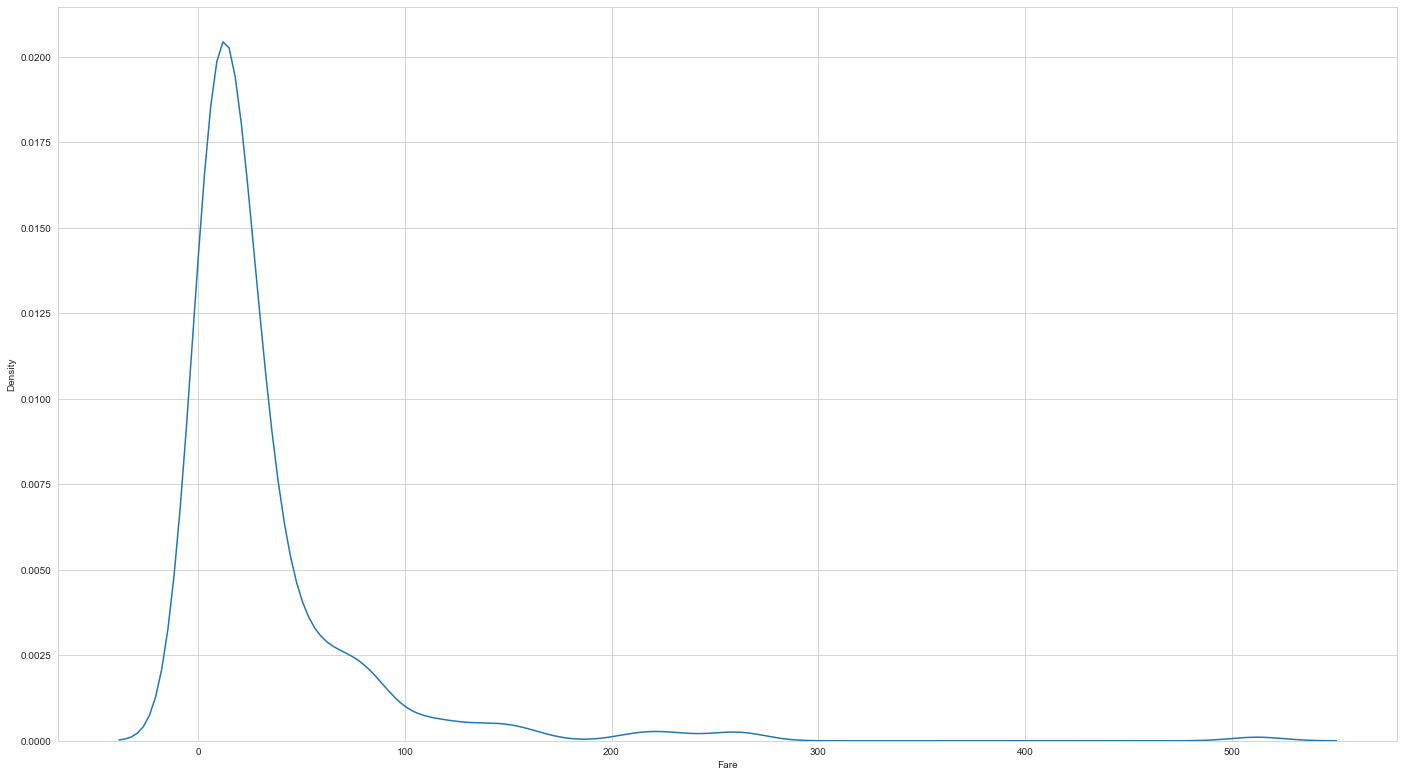

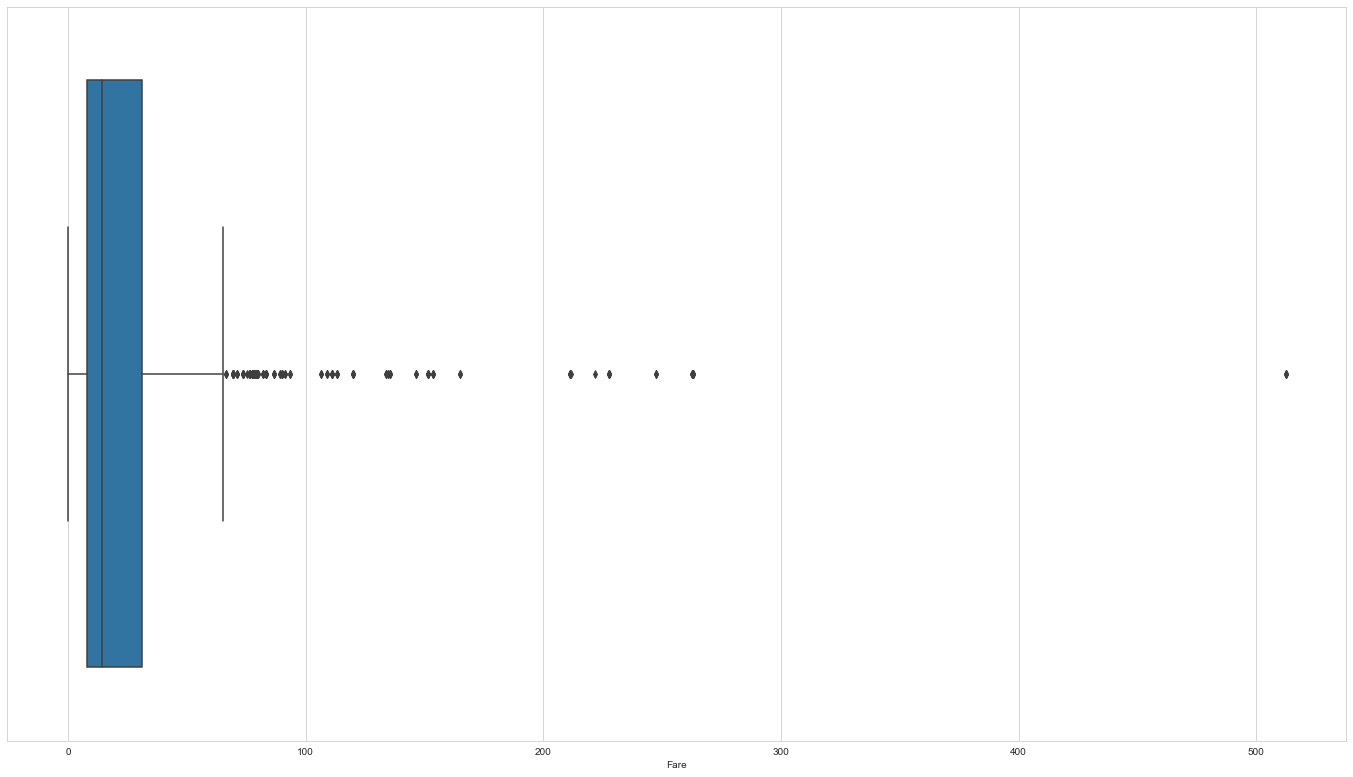

In [13]:
plt.figure(figsize=(24,13.5))
sns.kdeplot(data=train['Fare'])
plt.show()

plt.figure(figsize=(24,13.5))
sns.boxplot(data=train, x='Fare')
plt.show()

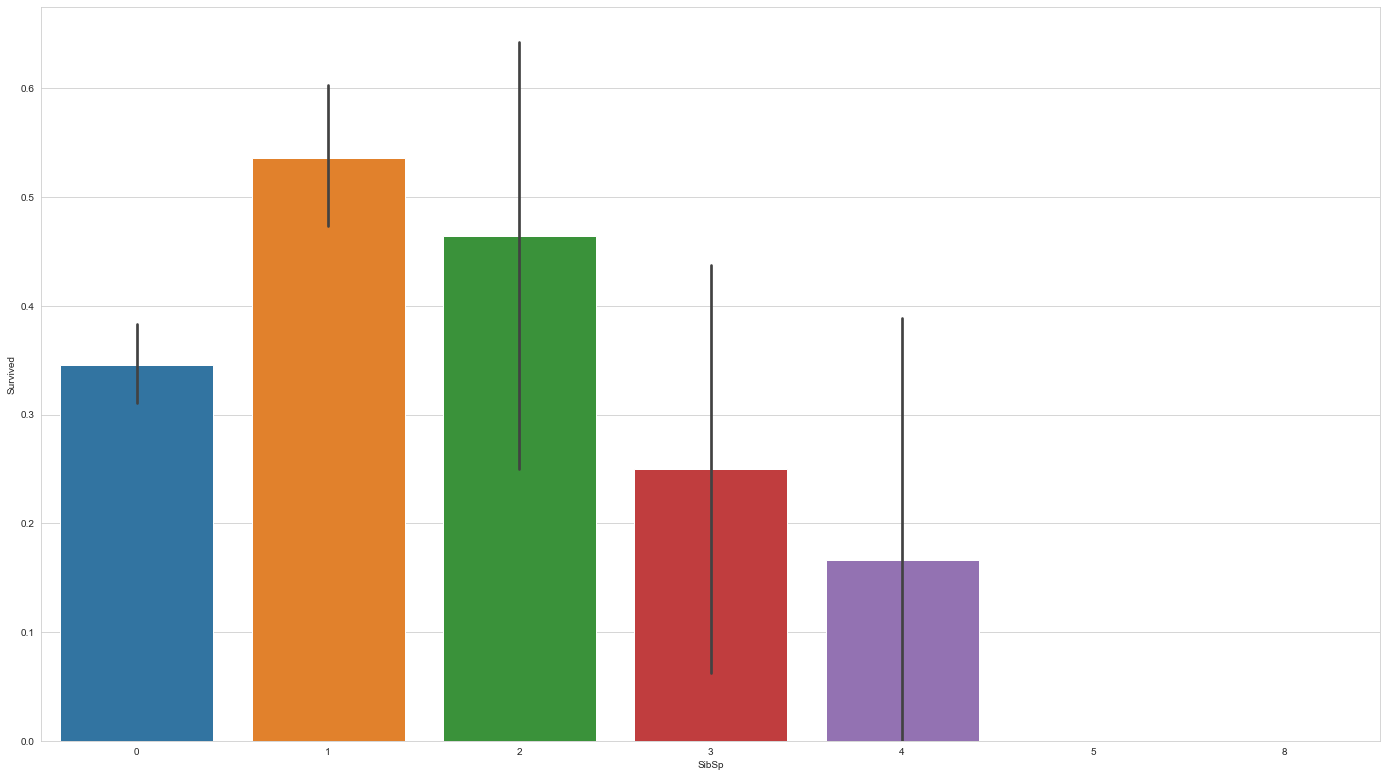

In [14]:
plt.figure(figsize=(24,13.5))
sns.barplot(data=train, x='SibSp', y='Survived')
plt.show()

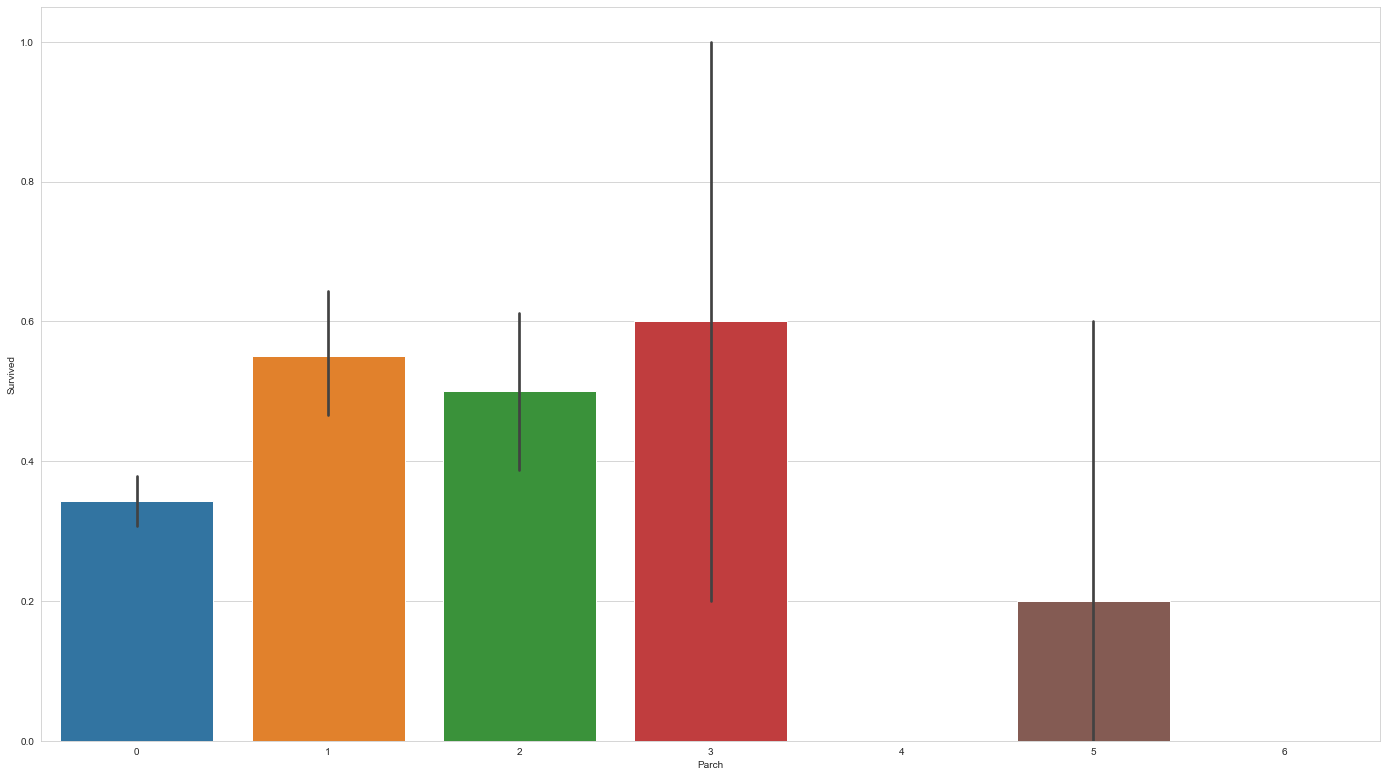

In [15]:
plt.figure(figsize=(24,13.5))
sns.barplot(data=train, x='Parch', y='Survived')
plt.show()

In [18]:
train.groupby('Parch').mean()

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.343658,2.321534,32.178503,0.237463,25.586774
1,0.550847,2.203390,24.422000,1.084746,46.778180
2,0.500000,2.275000,17.216912,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


In [19]:
train.loc[:, 'Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
train[train['Parch'] == 4]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900,NaN,S
361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.900,NaN,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S
568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


In [21]:
train[train['Parch'] == 6]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


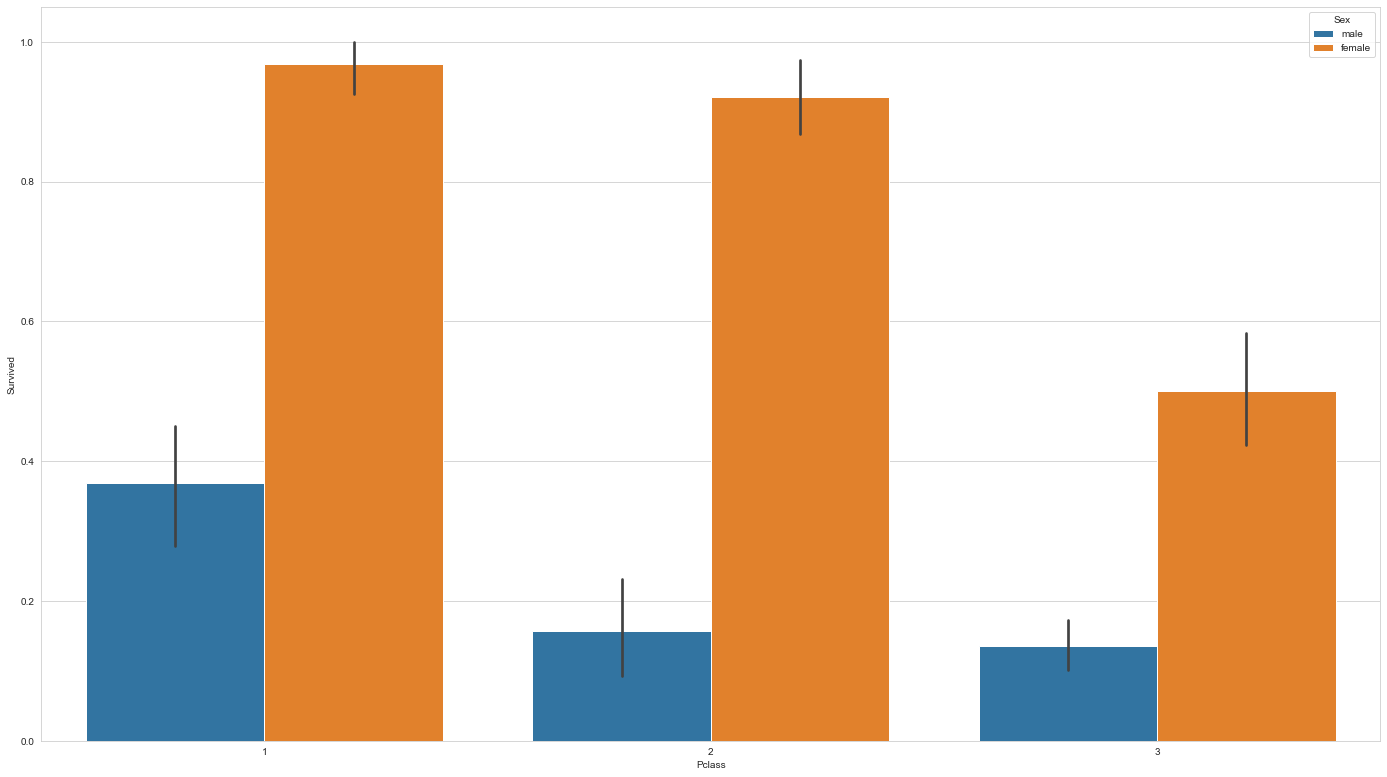

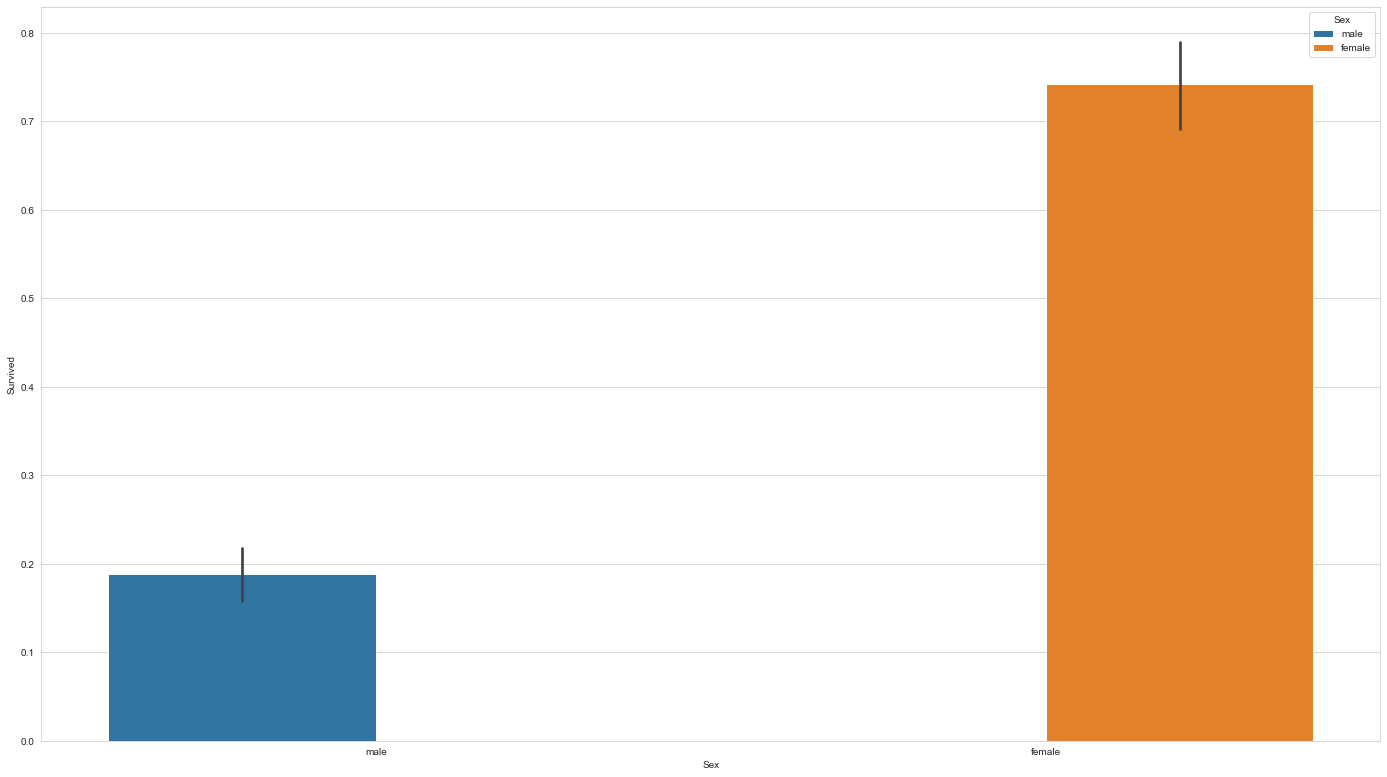

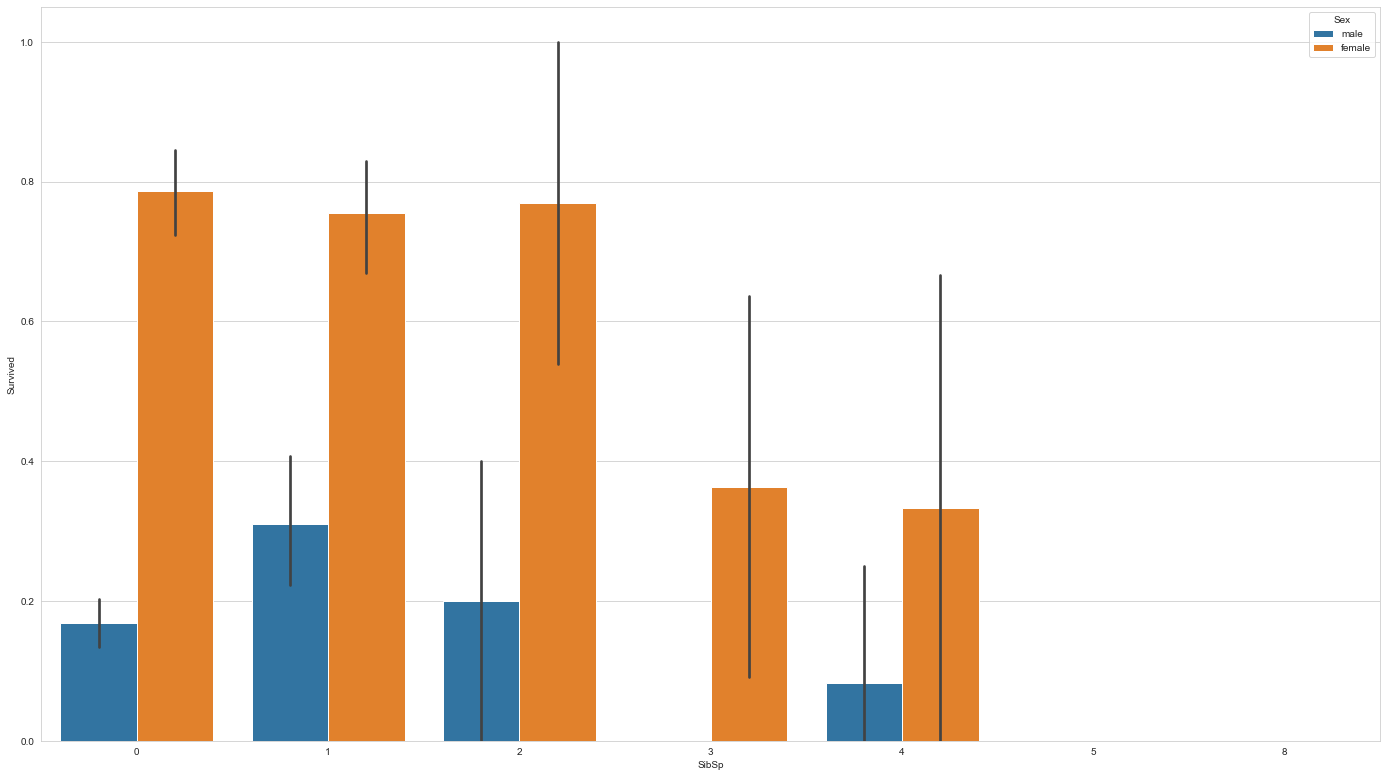

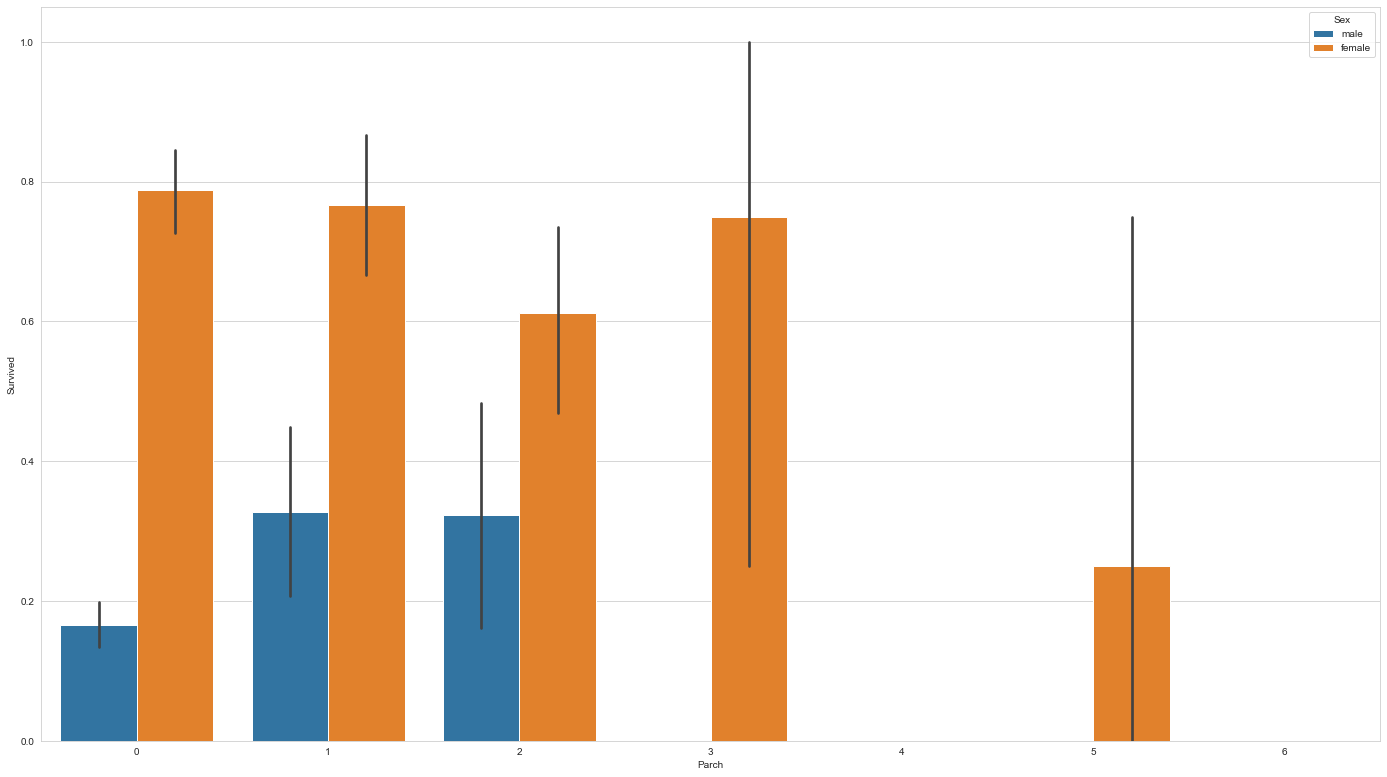

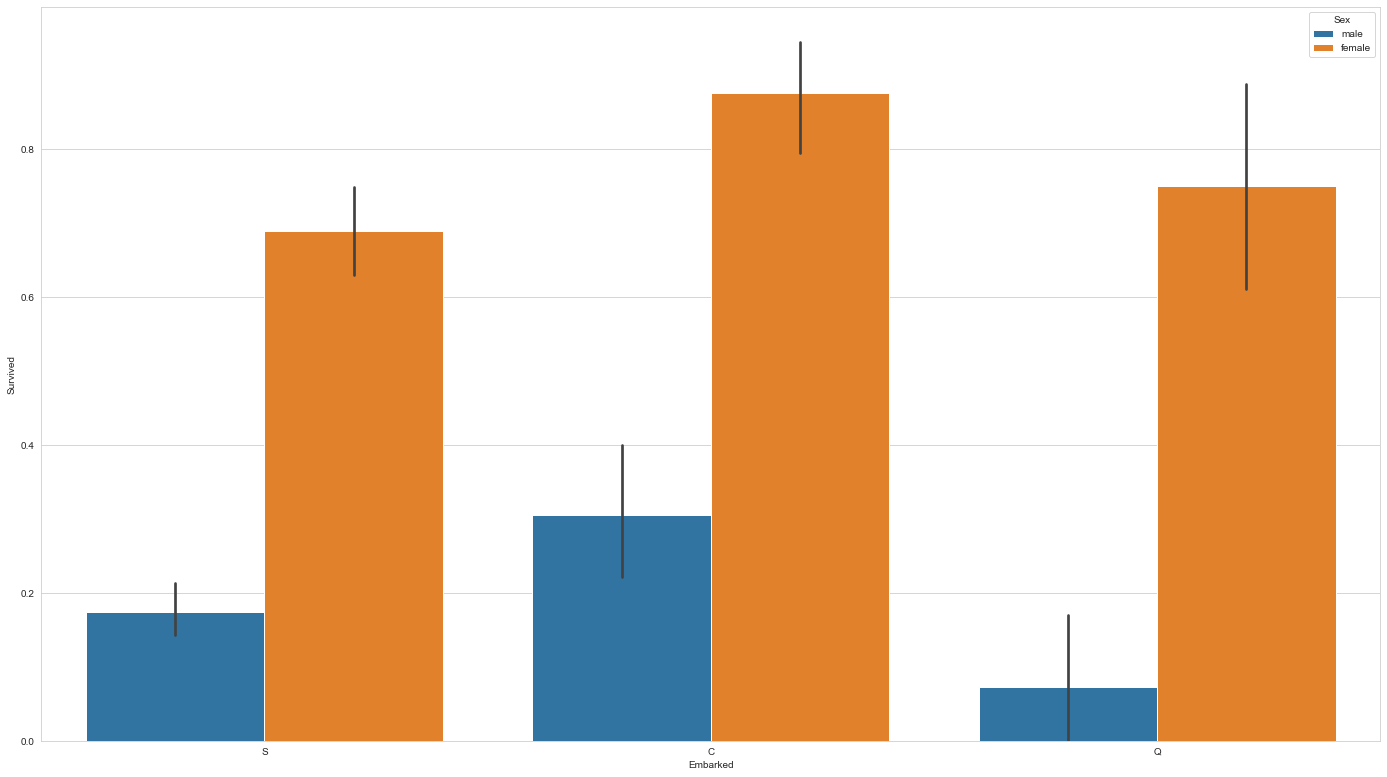

In [22]:
for col in categorical:
    plt.figure(figsize=(24,13.5))
    sns.barplot(x=train[col], y=train['Survived'], hue=train['Sex'])
    plt.show()

<Figure size 1728x972 with 0 Axes>

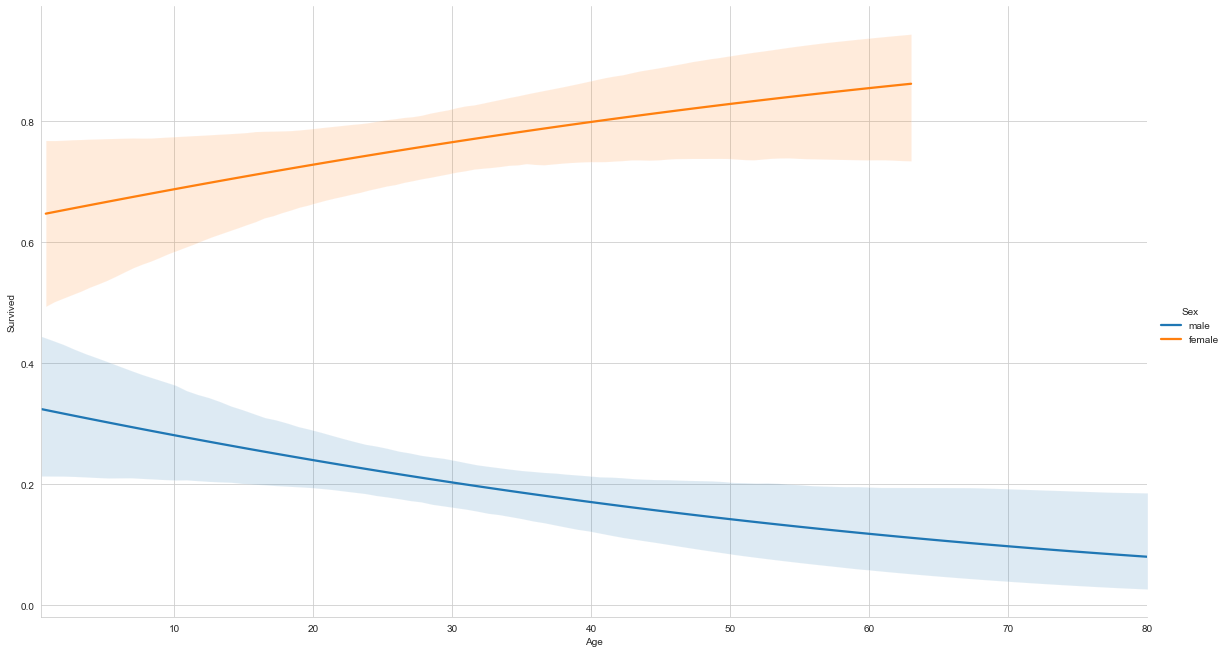

<Figure size 1728x972 with 0 Axes>

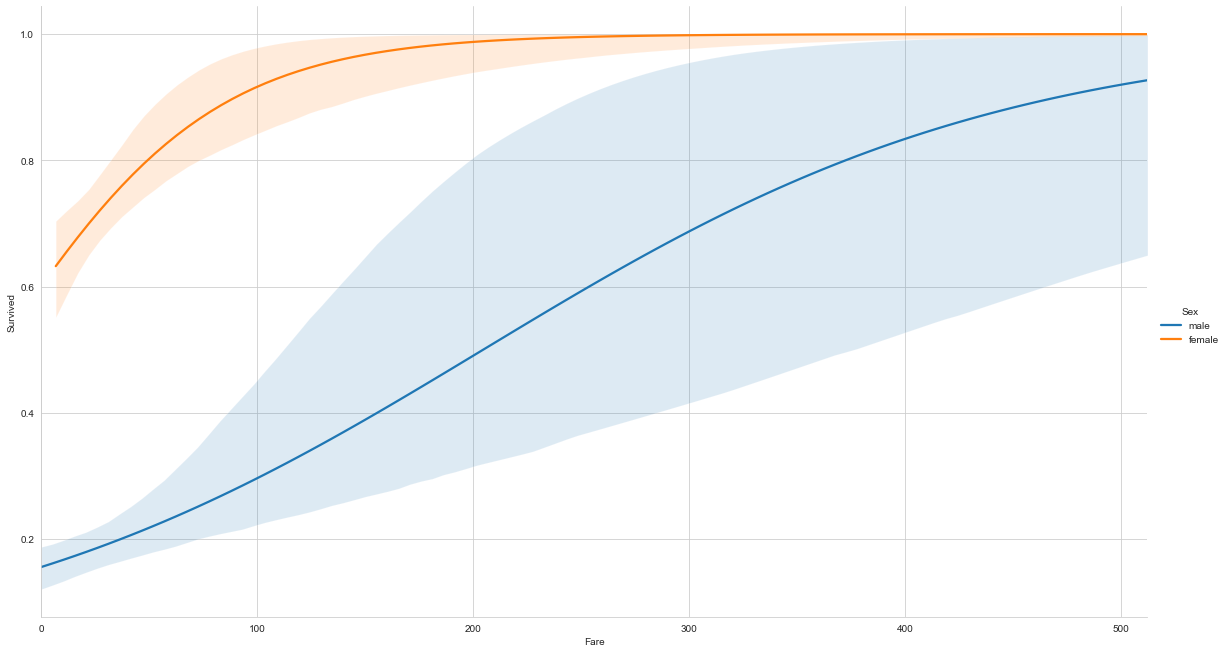

In [23]:
for col in numerical:
    plt.figure(figsize=(24,13.5))
    sns.lmplot(data = train, x=col, y='Survived', hue='Sex', logistic=True, scatter=False, height=9, aspect=16/9)
    plt.show()

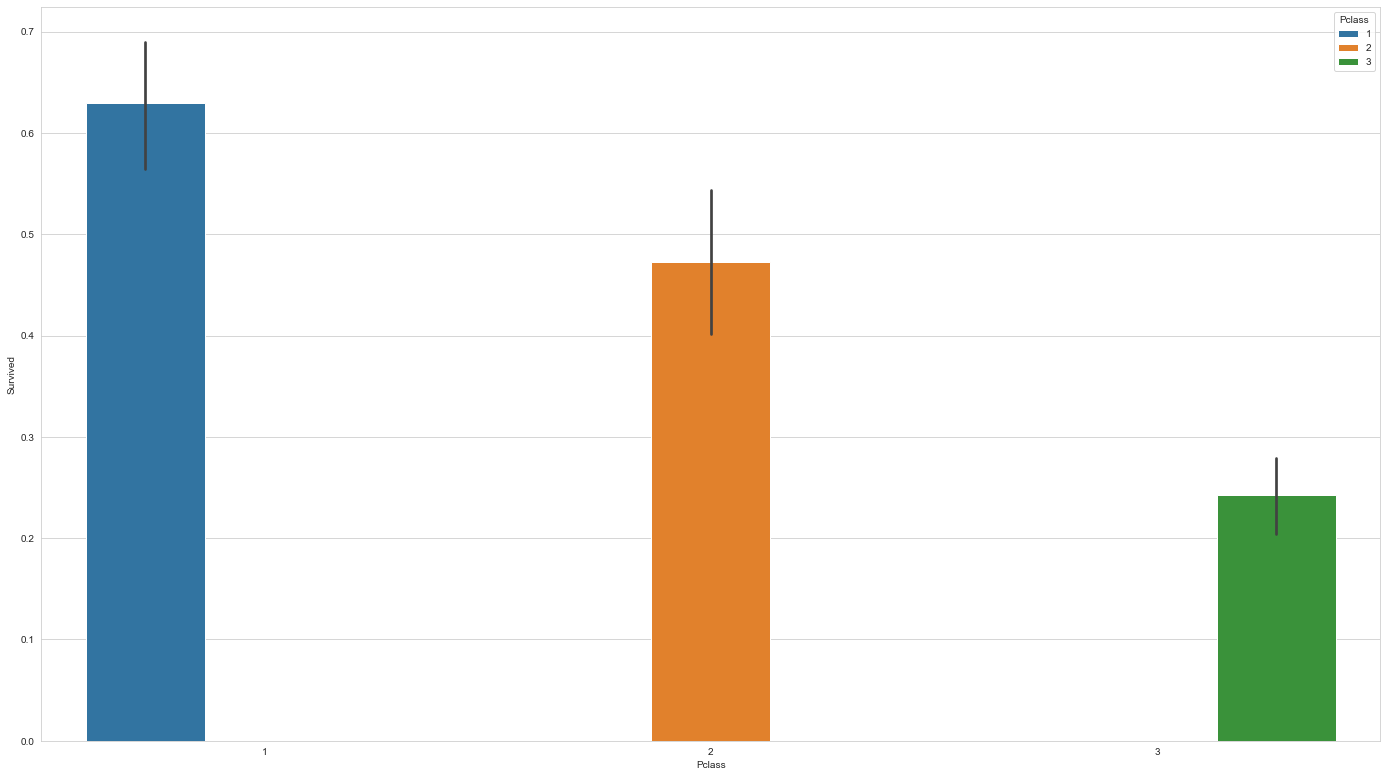

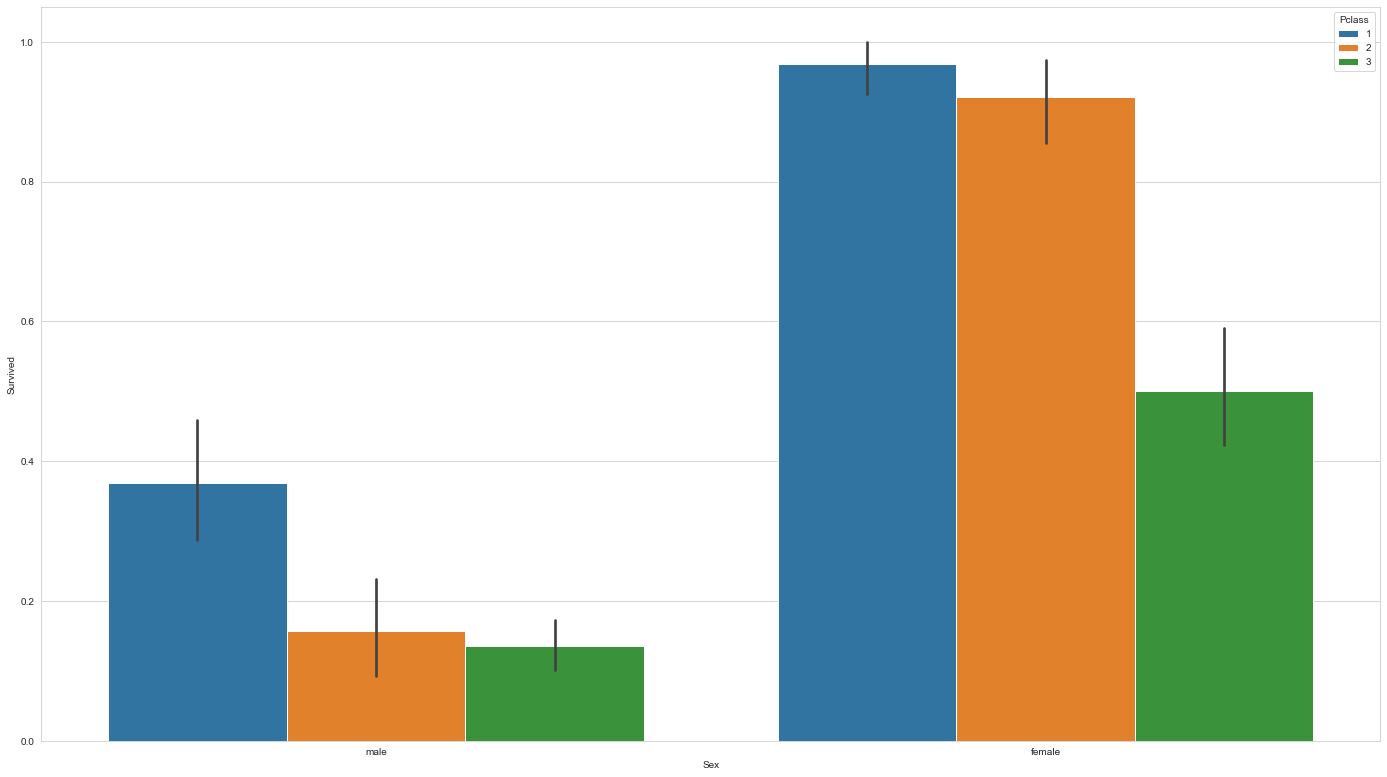

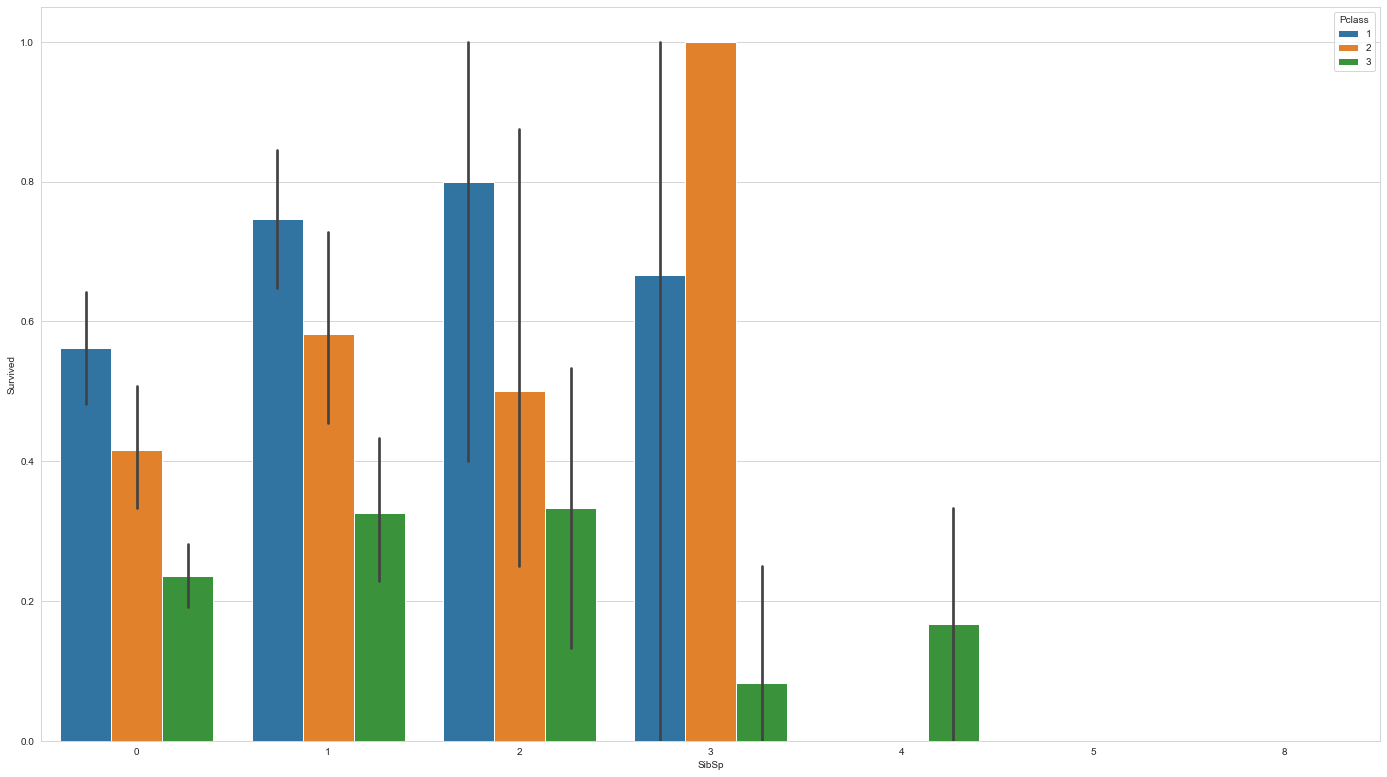

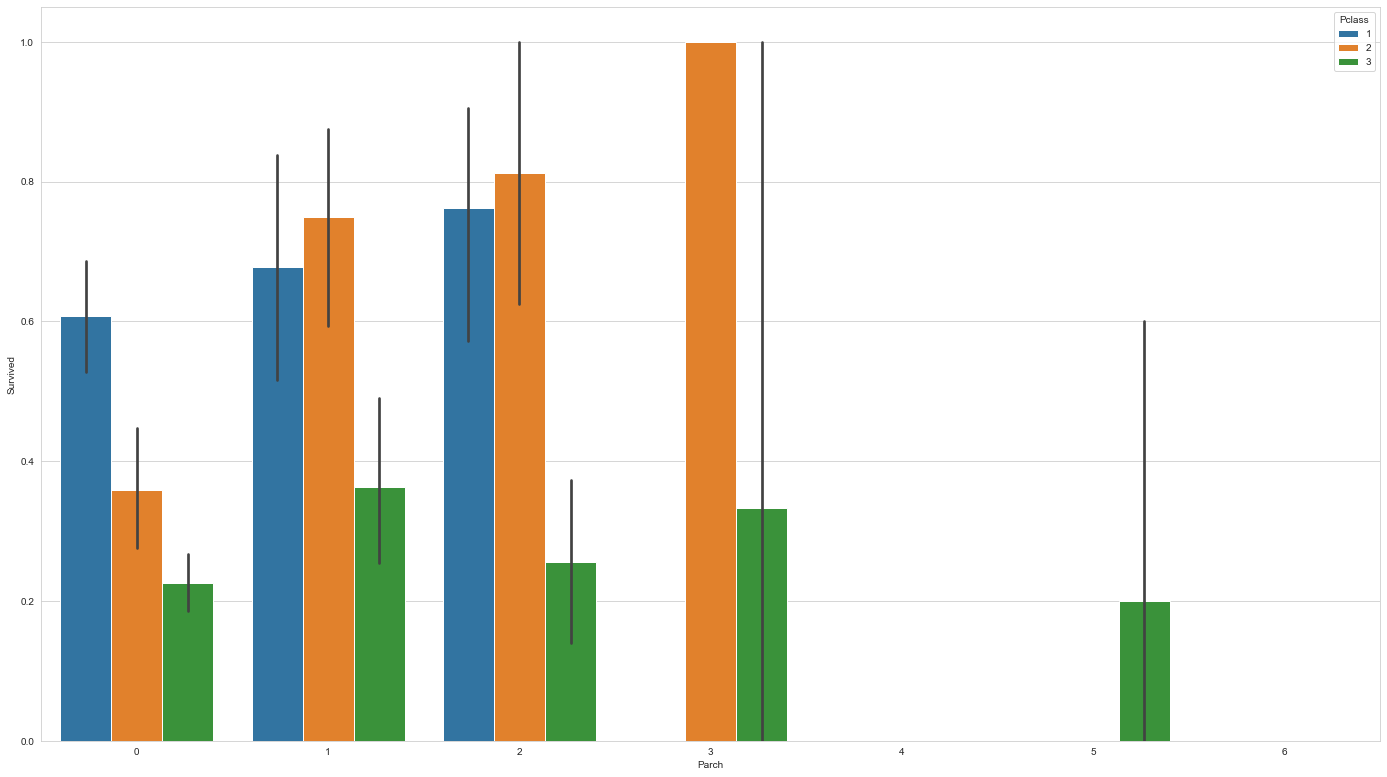

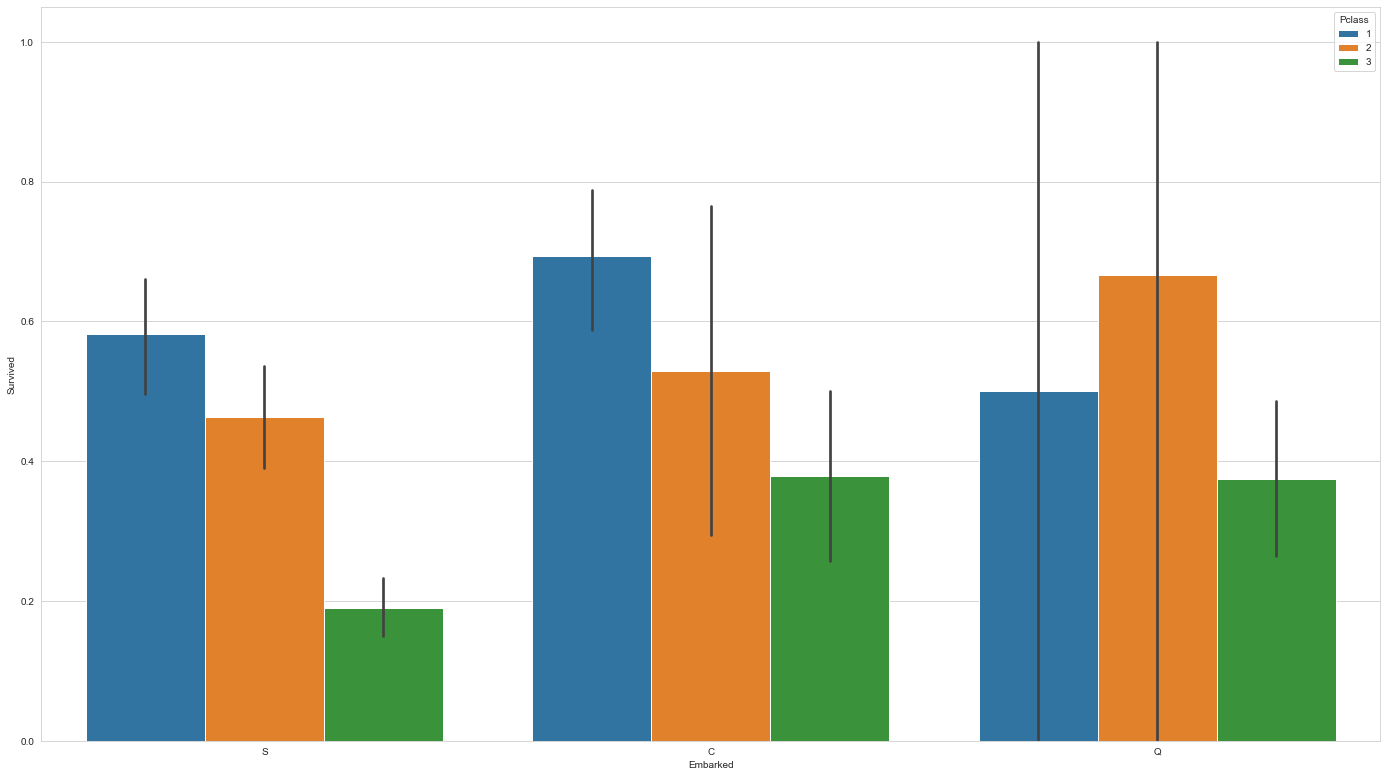

In [25]:
for col in categorical:
    plt.figure(figsize=(24,13.5))
    sns.barplot(x=train[col], y=train['Survived'], hue=train['Pclass'])
    plt.show()

<Figure size 1728x972 with 0 Axes>

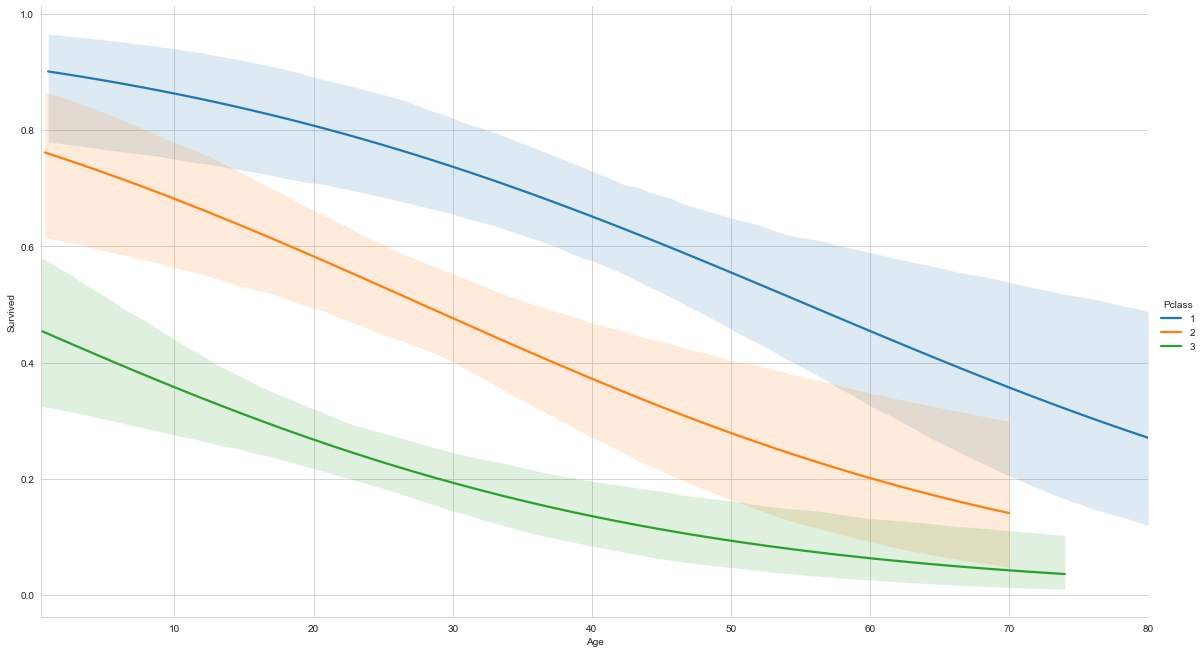

<Figure size 1728x972 with 0 Axes>

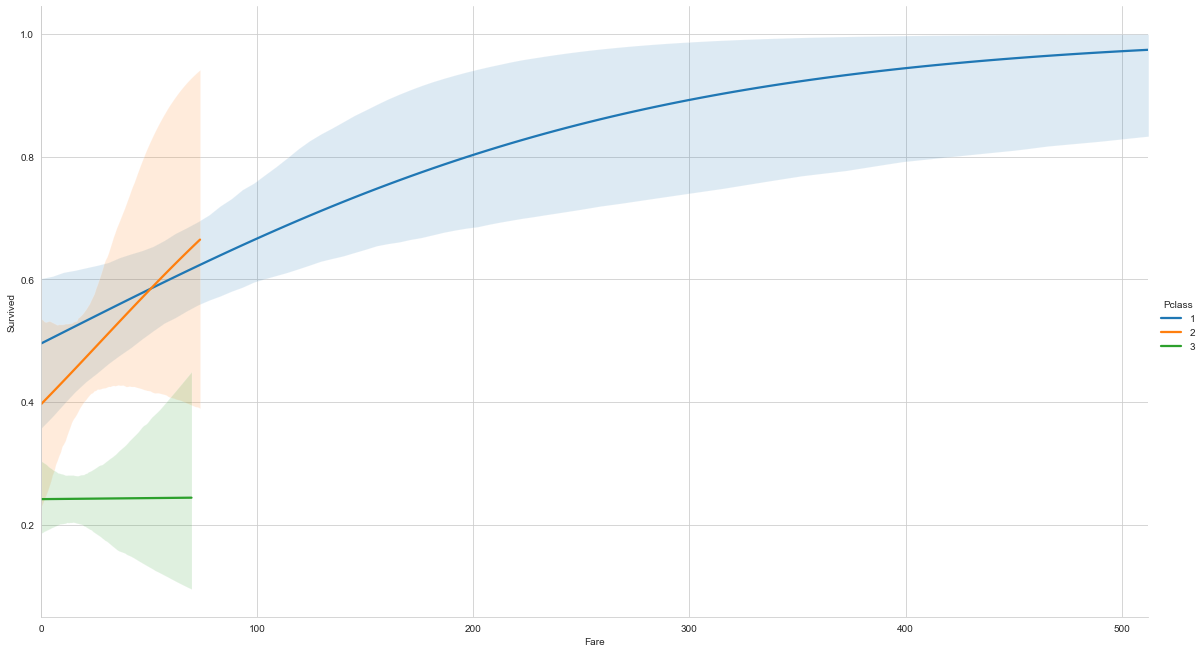

In [26]:
for col in numerical:
    plt.figure(figsize=(24,13.5))
    sns.lmplot(data = train, x=col, y='Survived', hue='Pclass', logistic=True, scatter=False, height=9, aspect=16/9)
    plt.show()

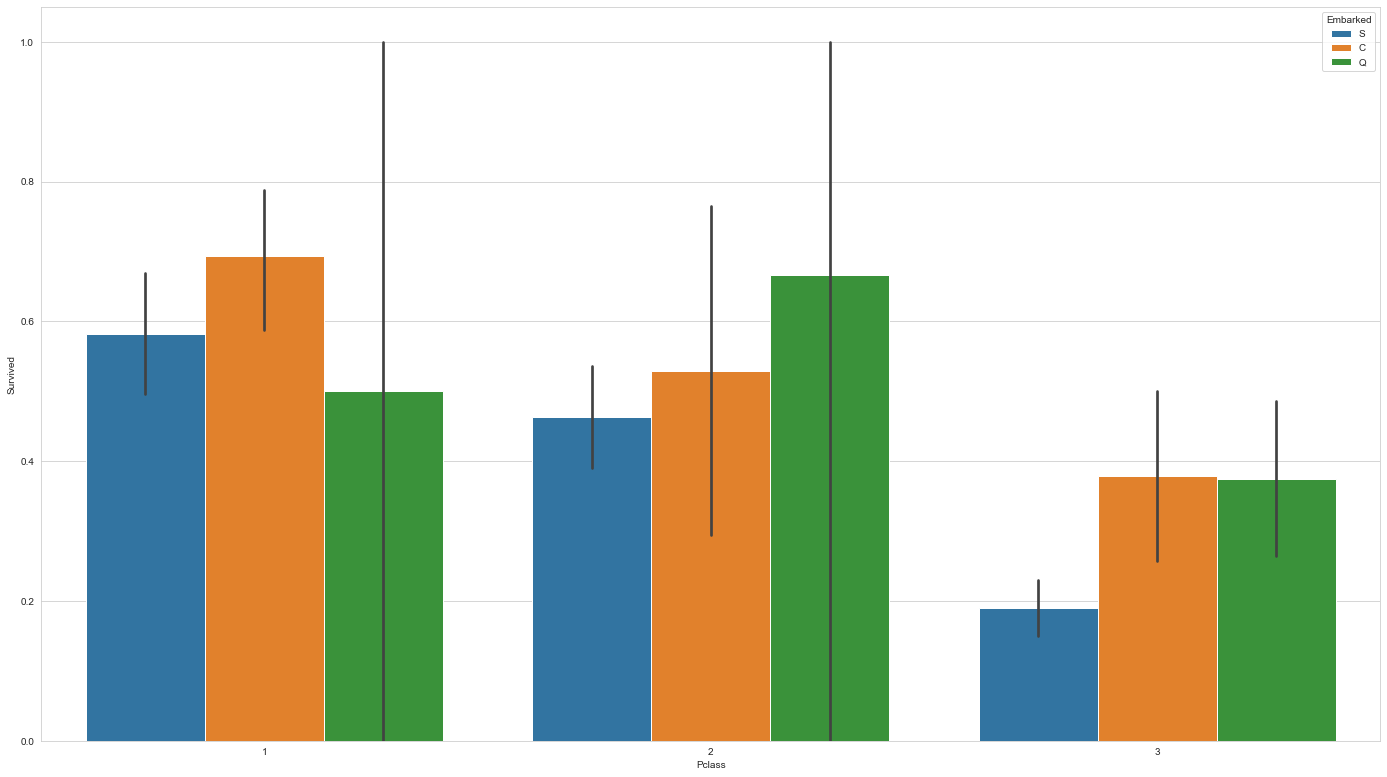

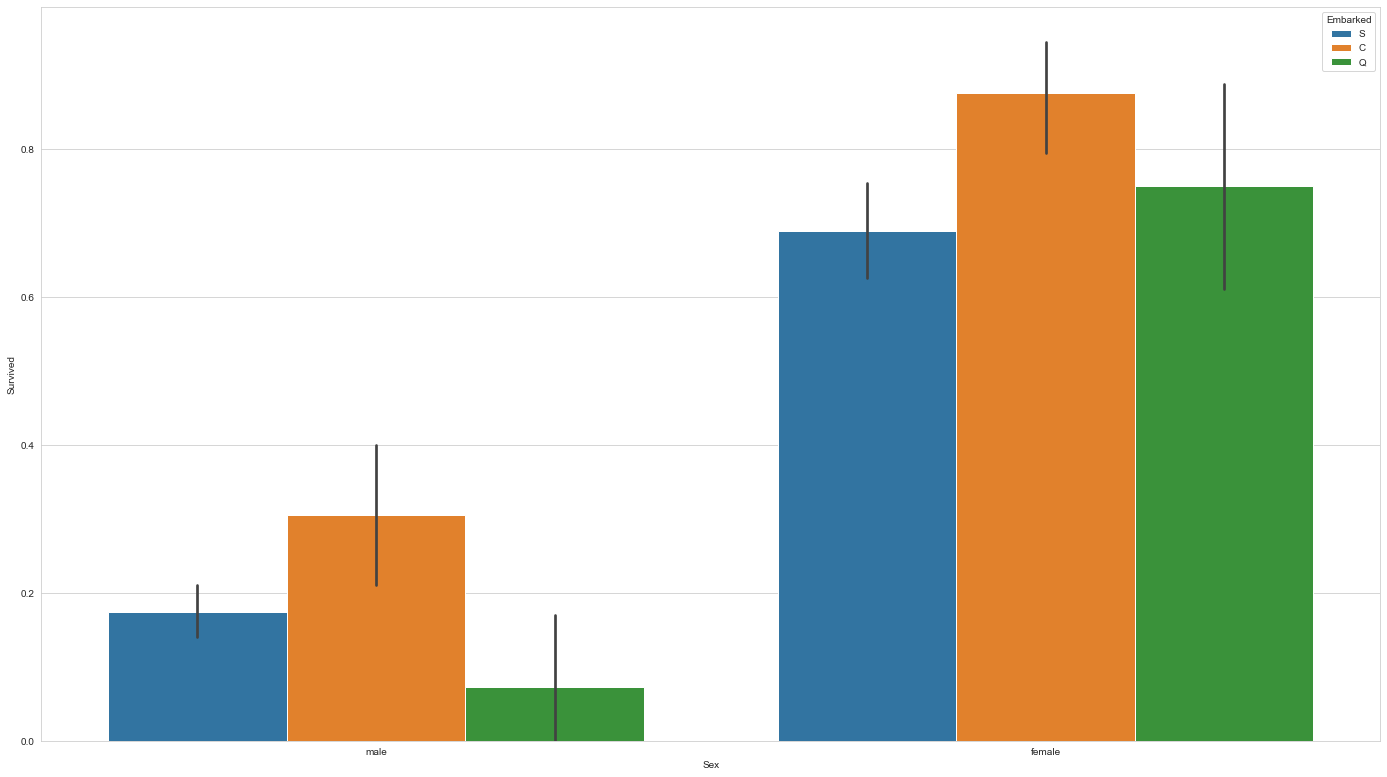

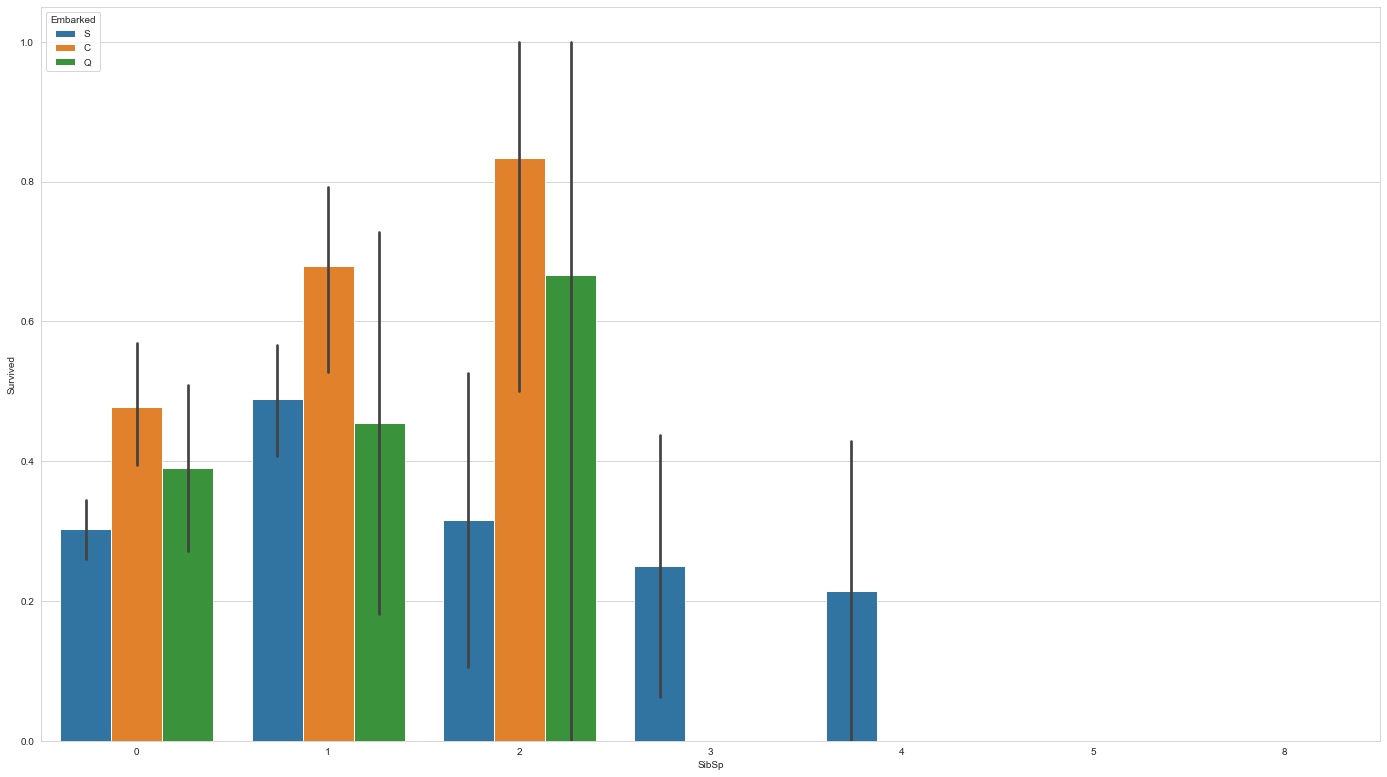

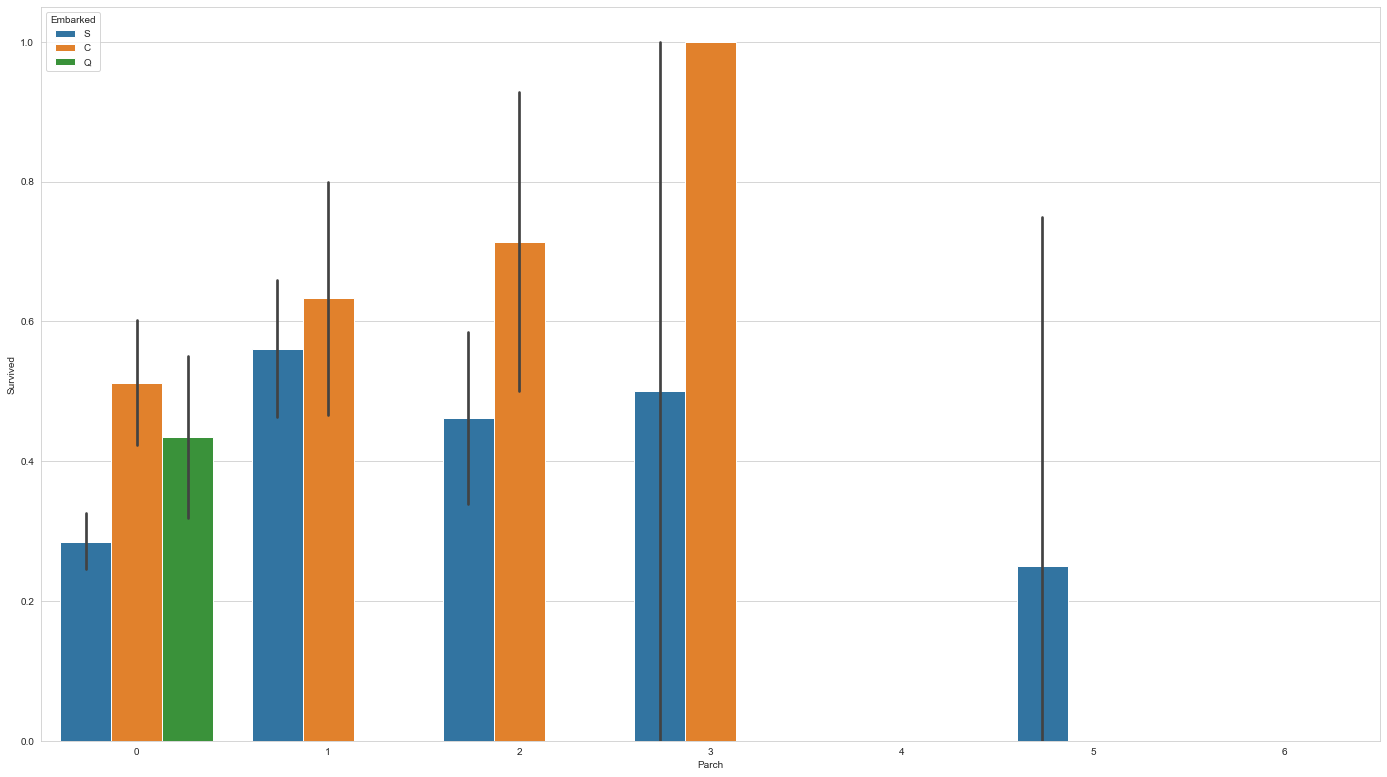

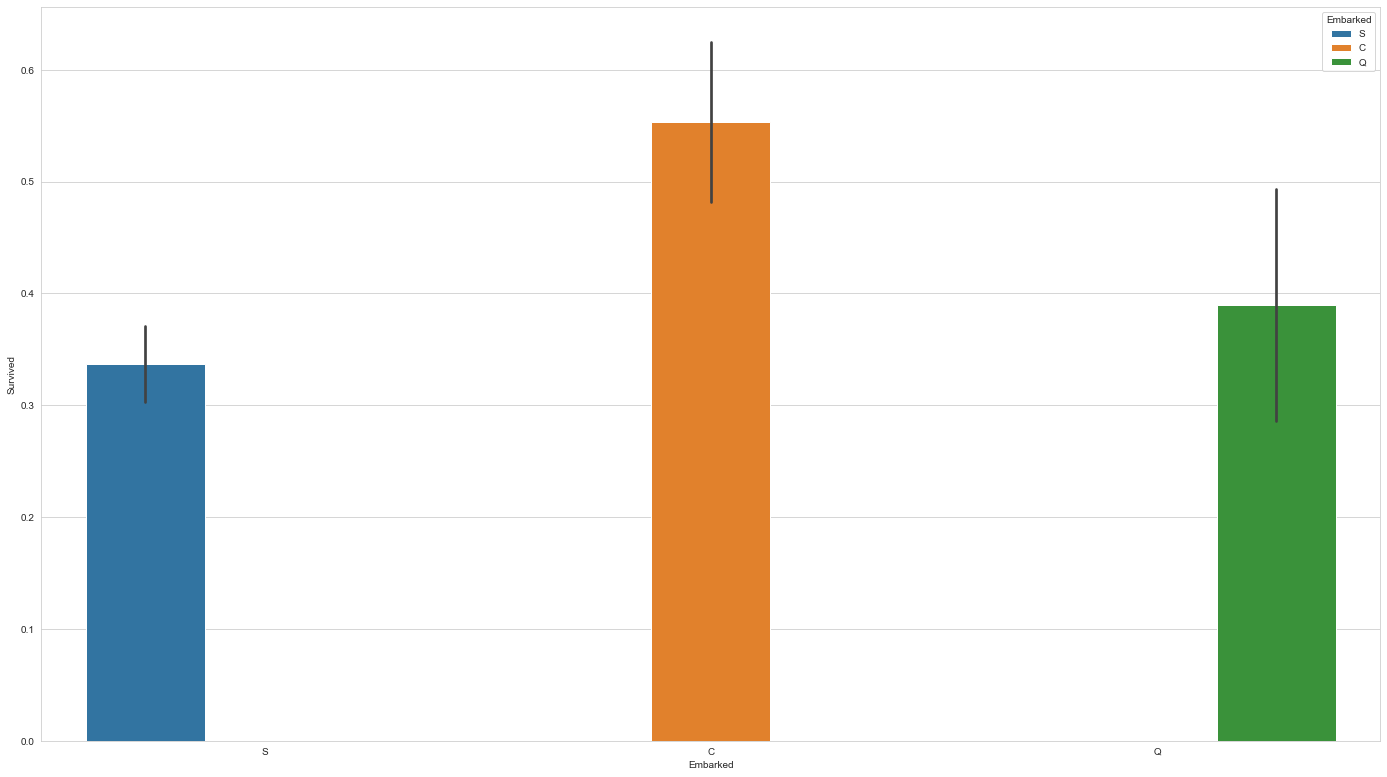

In [27]:
for col in categorical:
    plt.figure(figsize=(24,13.5))
    sns.barplot(x=train[col], y=train['Survived'], hue=train['Embarked'])
    plt.show()

<Figure size 1728x972 with 0 Axes>

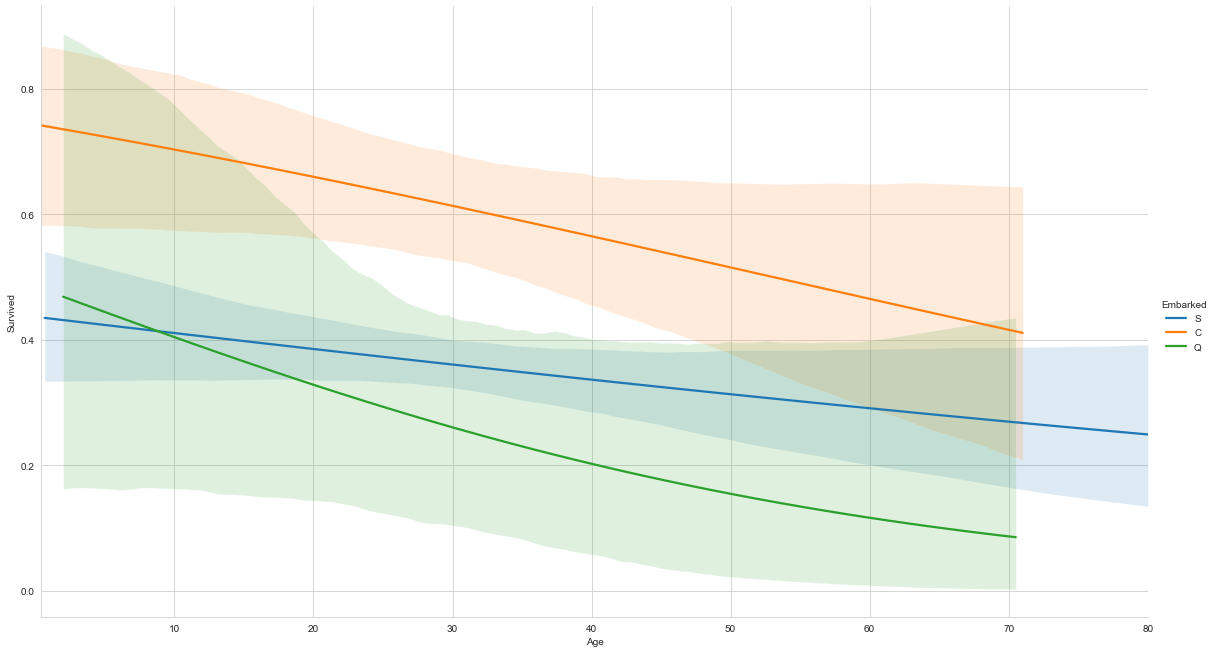

<Figure size 1728x972 with 0 Axes>

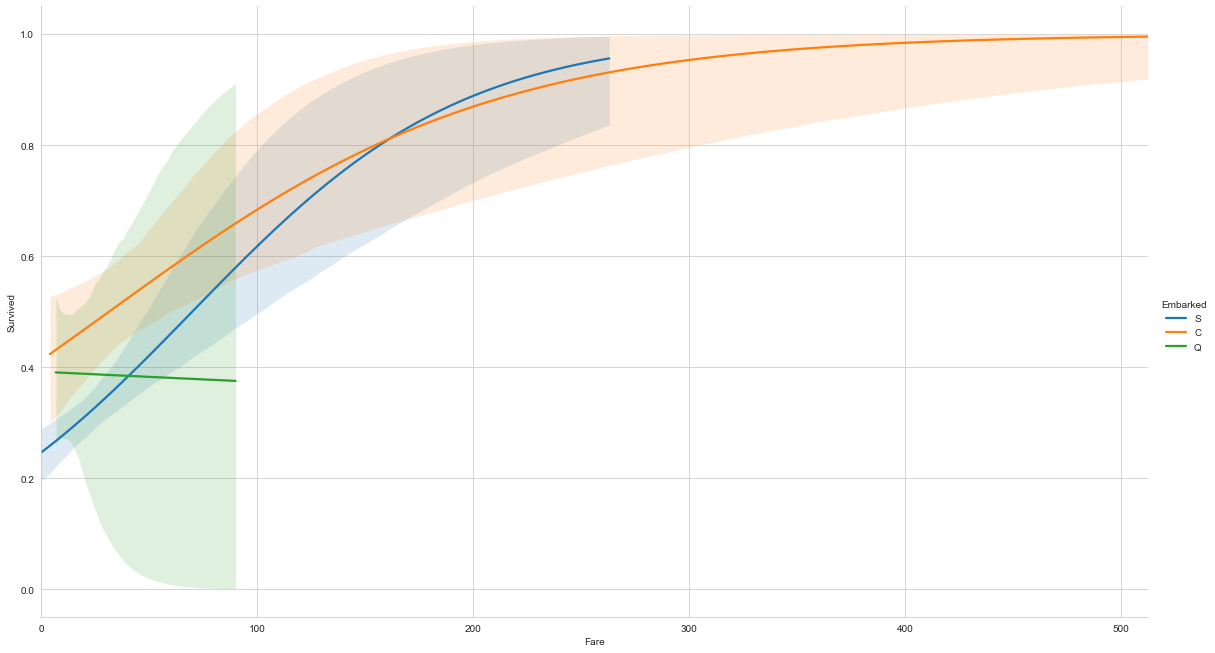

In [28]:
for col in numerical:
    plt.figure(figsize=(24,13.5))
    sns.lmplot(data = train, x=col, y='Survived', hue='Embarked', logistic=True, scatter=False, height=9, aspect=16/9)
    plt.show()

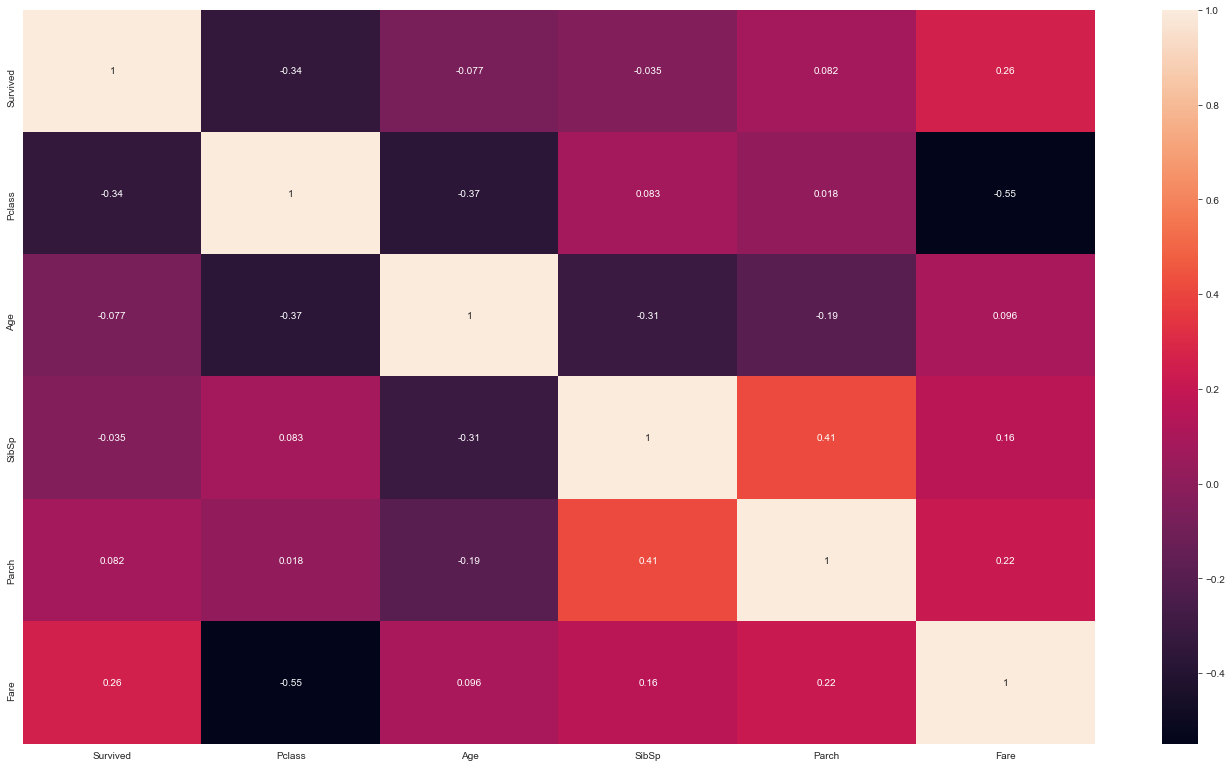

In [29]:
plt.figure(figsize=(24,13.5))
sns.heatmap(data=train.corr(), annot=True)
plt.show()

In [30]:
X = train.drop(['Cabin', 'Ticket', 'Name', 'Survived'], axis=1)

y = train.Survived

In [32]:
categorical = [col for col in X.columns if X[col].dtype == 'object' or X[col].nunique() <= 8]

numerical = [col for col in X.columns if col not in categorical]

categorical, numerical

(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], ['Age', 'Fare'])

In [33]:
def encode(X):
    df = X.copy()
    df['Embarked'].replace({
        'C': 3,
        'S': 2,
        'Q': 1
    }, inplace=True)

    df['Sex'].replace({
        'male': 0,
        'female': 1
    }, inplace=True)
    return df

In [34]:
def points(X):
    df = X.copy()
    LowAge = df.loc[:, 'Age'].quantile(0.25)
    HighAge = df.loc[:, 'Age'].quantile(0.75)
    df.loc[:, 'Family'] = df['Parch']+df['SibSp']
    df.loc[:, 'Wealth Score'] = df['Fare'] / df['Pclass']
    HighWealth = df['Wealth Score'].quantile(0.6)
    for row in df.index:
        tally = 0
        if df.loc[row, 'Pclass'] == 1:
            tally += 2
        elif df.loc[row, 'Pclass'] == 2:
            tally += 1
        else:
            pass

        if df.loc[row, 'Sex'] == 1:
            tally += 1
        else:
            pass

        if df.loc[row, 'Embarked'] == 3:
            tally += 2
        elif df.loc[row, 'Embarked'] == 2:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'SibSp'] in [0, 1, 2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Sex'] == 1 and df.loc[row, 'Parch'] in [0, 1, 2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Sex'] == 1 and df.loc[row, 'Pclass'] == 1:
            tally += 3
        elif df.loc[row, 'Sex'] == 1 and df.loc[row, 'Pclass'] == 2:
            tally += 2
        else:
            pass

        if df.loc[row, 'Sex'] == 1 and (df.loc[row, 'Age'] < LowAge or df.loc[row, 'Age'] > HighAge):
            tally += 3
        elif df.loc[row, 'Age'] < LowAge:
            tally += 1
        else:
            pass

        if df.loc[row, 'Wealth Score'] > HighWealth:
            tally += 1
        else:
            pass

        if df.loc[row, 'Embarked'] == 3 and df.loc[row, 'Parch'] in [0,1,2]:
            tally += 2
        elif df.loc[row, 'Embarked'] == 2 and df.loc[row, 'Parch'] in [1,3]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Embarked'] == 1 and df.loc[row, 'Parch'] == 0:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Embarked'] == 2 and df.loc[row, 'SibSp'] in [0,1]:
            tally += 1
        elif df.loc[row, 'Embarked'] in [1, 3] and df.loc[row, 'SibSp'] in [0,1,2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 1 and df.loc[row, 'SibSp'] in [0,1,2]:
            tally += 2
        elif df.loc[row, 'Pclass'] == 1 and df.loc[row, 'SibSp'] == 3:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 2 and df.loc[row, 'SibSp'] in [0,1,3]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 3 and df.loc[row, 'SibSp'] in [0,1,2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 1 and df.loc[row, 'Parch'] in [0,1,2]:
            tally += 2
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 2 and df.loc[row, 'Parch'] in [0, 1, 2, 3]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 3 and df.loc[row, 'Parch'] == 1:
            tally += 1
        else:
            pass

        df.loc[row, 'Point Score'] = tally

    df.loc[:, 'Overall Score'] = df['Point Score'] * df['Wealth Score']
    High_Overall = 1250
    HighPoints = 10
    HighWealth = 200
    
    for row in df.index:
        if df.loc[row, 'Overall Score'] >= 2400:
            df.loc[row, 'High Overall'] = 1
        else:
            df.loc[row, 'High Overall'] = 0
            
        if df.loc[row, 'Point Score'] >= 13:
            df.loc[row, 'High Points'] = 1
        else:
            df.loc[row, 'High Points'] = 0
        
        if df.loc[row, 'Wealth Score'] >= 200:
            df.loc[row, 'High Wealth'] = 1
        else:
            df.loc[row, 'High Wealth'] = 0
        
    return df

In [35]:
def prep(x):
    df = x.copy()
    df = points(encode(df))
    return df.loc[:, ['Overall Score', 'Point Score', 'Wealth Score', 'High Overall', 'High Points']+categorical+numerical]

<Figure size 1728x972 with 0 Axes>

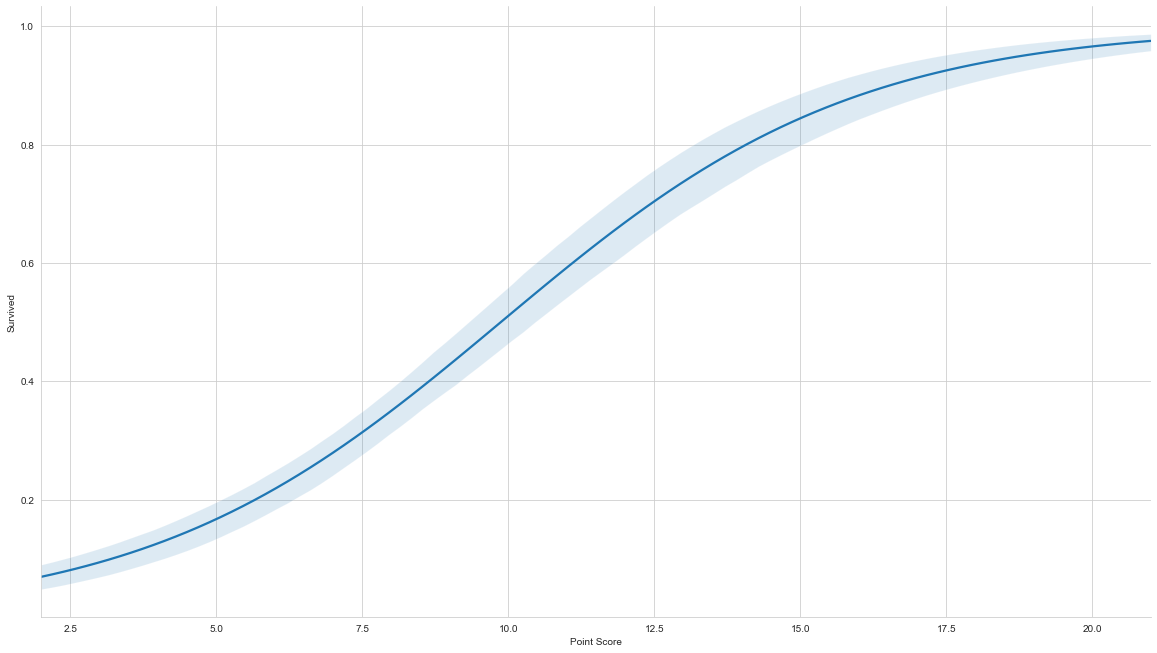

In [36]:
plt.figure(figsize=(24,13.5))
sns.lmplot(data=points(encode(train)), x='Point Score', y='Survived', logistic=True, scatter=False, height=9, aspect=16/9)
plt.show()

<Figure size 1728x972 with 0 Axes>

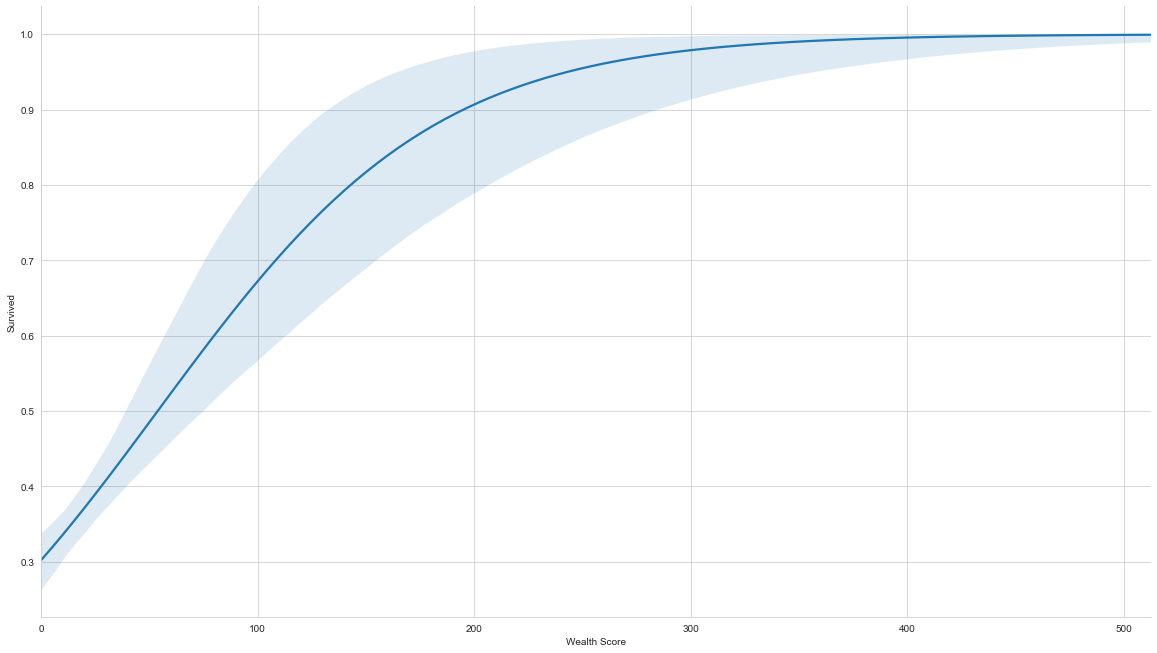

In [37]:
plt.figure(figsize=(24,13.5))
sns.lmplot(data=points(encode(train)), x='Wealth Score', y='Survived', logistic=True, scatter=False, height=9, aspect=16/9)
plt.show()

<Figure size 1728x972 with 0 Axes>

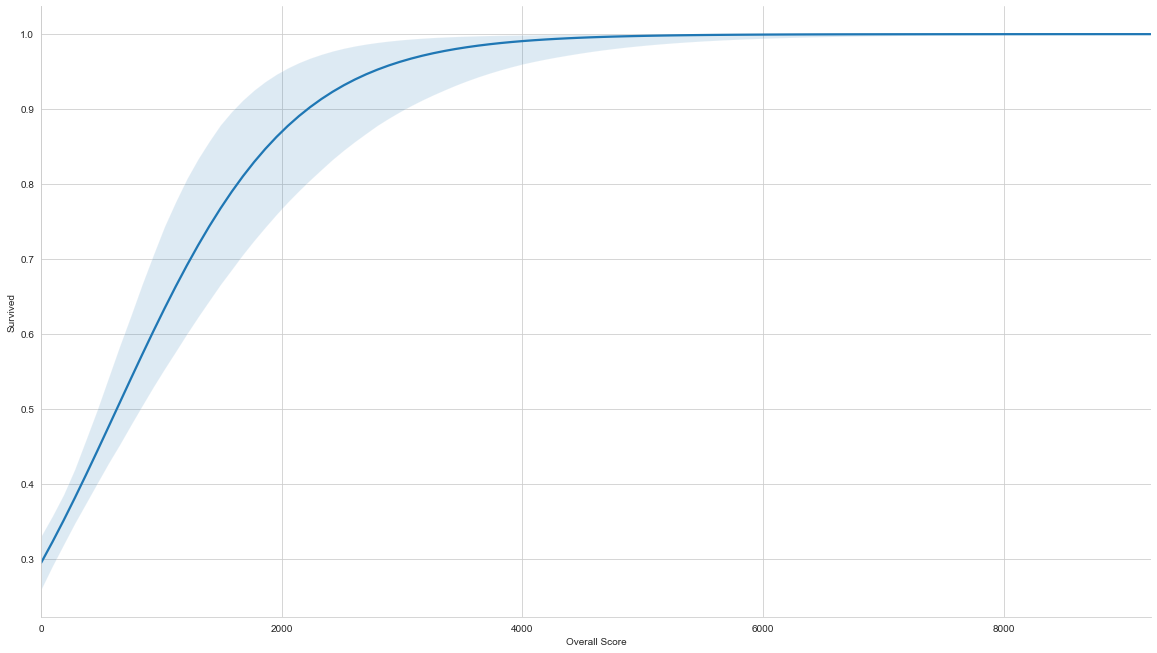

In [38]:
plt.figure(figsize=(24,13.5))
sns.lmplot(data=points(encode(train)), x='Overall Score', y='Survived', logistic=True, scatter=False, height=9, aspect=16/9)
plt.show()

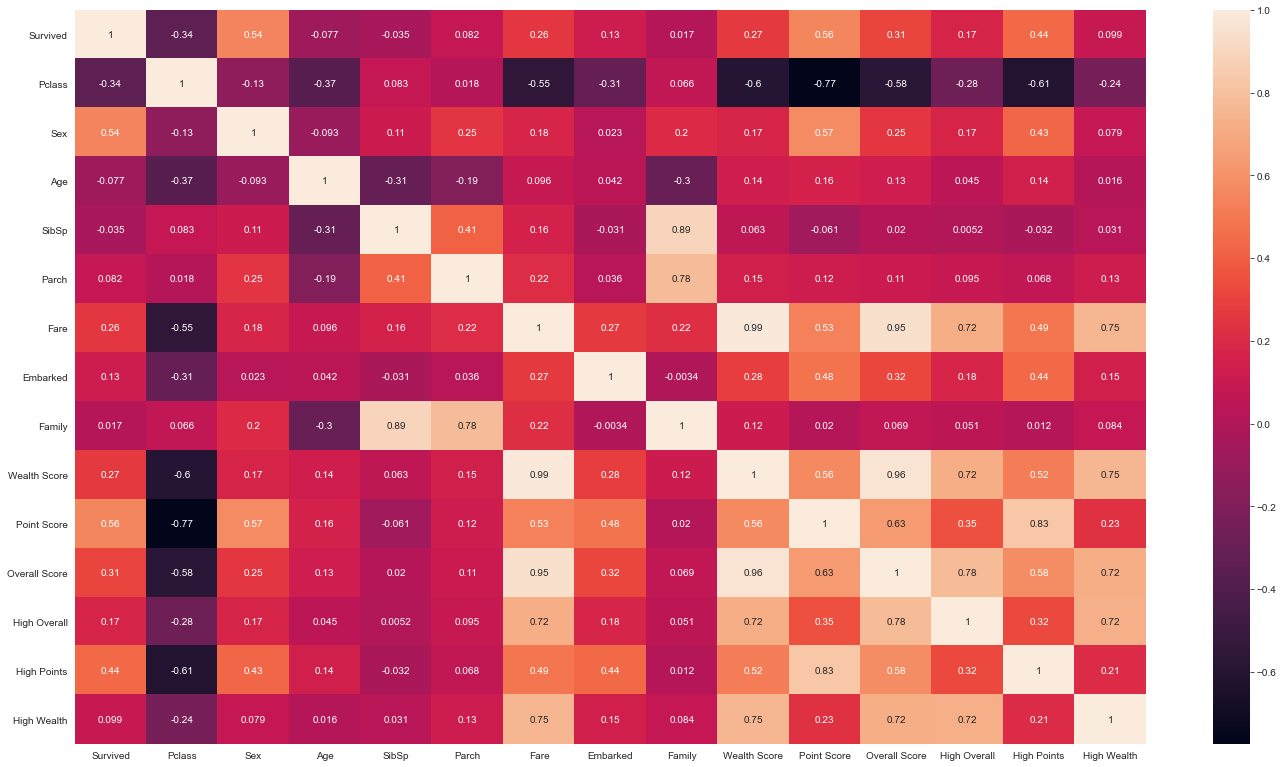

In [39]:
plt.figure(figsize=(24,13.5))
sns.heatmap(data=points(encode(train)).corr(), annot=True)
plt.show()

In [41]:
full = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalise', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', linear_model.LogisticRegression(C=1, solver='newton-cg', penalty='l2'))
])

In [42]:
rffull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', ensemble.RandomForestClassifier(n_estimators=1300, min_samples_split=5, min_samples_leaf=4, max_depth=30, max_features='sqrt', bootstrap=False))
])

In [43]:
gbfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', ensemble.GradientBoostingClassifier(validation_fraction=0.3,
                                                    subsample=1,
                                                    n_iter_no_change=5,
                                                    n_estimators=360,
                                                    min_samples_split=2,
                                                    min_samples_leaf=1,
                                                    max_depth=2,
                                                    learning_rate=0.4))

SyntaxError: unexpected EOF while parsing (<ipython-input-43-9862cdd89c36>, line 12)

In [44]:
adafull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', ensemble.AdaBoostClassifier(linear_model.LogisticRegression(C=1, solver='lbfgs', penalty='l2'), n_estimators=1000, learning_rate=0.05))
])

In [45]:
bfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', naive_bayes.GaussianNB()),
])

In [46]:
SVCfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', svm.LinearSVC(C=0.85, penalty='l2', max_iter=4897))
])

In [47]:
knnfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', neighbors.KNeighborsClassifier(weights='uniform', n_neighbors=6, algorithm='kd_tree', n_jobs=-1))
])

In [49]:
for col in numerical:
    X.loc[:, col] = X[col].fillna(X[col].median())
    test.loc[:, col] = test[col].fillna(test[col].median())

X.loc[:, categorical] = X[categorical].fillna(0)
test.loc[:, categorical] = test[categorical].fillna(0)

In [50]:
logistic = model_selection.cross_val_score(full, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

logacc = model_selection.cross_val_score(full, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [51]:
randomforest = model_selection.cross_val_score(rffull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

rfacc = model_selection.cross_val_score(rffull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [53]:
gradient_boost = model_selection.cross_val_score(gbfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

gbacc = model_selection.cross_val_score(gbfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

NameError: name 'gbfull' is not defined

In [54]:
adaboost = model_selection.cross_val_score(adafull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

adaacc = model_selection.cross_val_score(adafull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [55]:
naiveBayes = model_selection.cross_val_score(bfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

naiveacc = model_selection.cross_val_score(bfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [56]:
svc = model_selection.cross_val_score(SVCfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

svcacc = model_selection.cross_val_score(SVCfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [57]:
knn = model_selection.cross_val_score(knnfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

knnacc = model_selection.cross_val_score(knnfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [58]:
modelscores = pd.DataFrame({
    'Logistic Regression': logistic,
    'Random Forest Classifier': randomforest,
    'Gradient Boosting Classifier': gradient_boost,
    'Adaboost Classifier': adaboost,
    'Naive Bayes Classifier': naiveBayes,
    'Support Vector Classifier': svc,
    'K-Nearest-Neighbors Classifier': knn
})

modelaccuracyscores = pd.DataFrame({
    'Logistic Regression': logacc,
    'Random Forest Classifier': rfacc,
    'Gradient Boosting Classifier': gbacc,
    'Adaboost Classifier': adaacc,
    'Naive Bayes Classifier': naiveacc,
    'Support Vector Classifier': svcacc,
    'K-Nearest-Neighbors Classifier': knnacc
})

plt.figure(figsize=(24,13.5))

sns.barplot(data=modelscores)

plt.show()

NameError: name 'gradient_boost' is not defined

In [59]:
plt.figure(figsize=(24,13.5))

sns.barplot(data=modelaccuracyscores)

plt.show()

NameError: name 'modelaccuracyscores' is not defined

<Figure size 1728x972 with 0 Axes>

In [60]:
modelscores.mean().sort_values(ascending=False)

NameError: name 'modelscores' is not defined

In [61]:
modelaccuracyscores.mean().sort_values(ascending=False)

NameError: name 'modelaccuracyscores' is not defined

In [62]:
rffull.fit(X,y)
full.fit(X, y)
gbfull.fit(X, y)
adafull.fit(X, y)
bfull.fit(X, y)
SVCfull.fit(X, y)
knnfull.fit(X, y)

rfpreds = rffull.predict(test)
lrpreds = full.predict(test)
gbpreds = gbfull.predict(test)
adapreds = adafull.predict(test)
bayespreds = bfull.predict(test)
svcpreds = SVCfull.predict(test)
knnpreds = knnfull.predict(test)

NameError: name 'gbfull' is not defined

In [63]:
predsdict = {'random-forest': rfpreds, 'logistic-regression': lrpreds, 'gradient_boosting': gbpreds, 'adaboost': adapreds, 'naive-bayes': bayespreds, 'support-vector': svcpreds, 'k-nearest-neighbors': knnpreds}

NameError: name 'rfpreds' is not defined

In [64]:
for predictions in predsdict.keys():
    output = pd.DataFrame({
        'PassengerId': test.index,
        'Survived': predsdict[predictions]
    })
    
    output.to_csv('{0}.csv'.format(predictions), index=False)

NameError: name 'predsdict' is not defined

In [16]:
# turns my type column into a dummy variable
#dummy = pd.get_dummies(df['Sex'])
#dummy.head()



,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [17]:
#df = pd.concat([df, dummy], axis=1)
#df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [18]:
#df = df.merge(dummy, left_index=True, right_index=True)
#df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female_x,male_x,female_y,male_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1


In [72]:
# Making a Scaler object
scaler = preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_numerical = scaler.fit_transform(train[numerical])
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [74]:
print(categorical)


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [75]:
print(numerical)

['Age', 'Fare']
